<a href="https://colab.research.google.com/github/Aryayayayaa/Labmentix/blob/main/FBI_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import Libraries

import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
import geopandas as gpd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sys
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost.callback import EarlyStopping
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

print("Libraries imported successfully.")

Libraries imported successfully.


In [ ]:
# Set plot style
# Configures the default style for all matplotlib and seaborn plots for better aesthetics.
sns.set_style("whitegrid") # Sets a white background with a grid.
plt.rcParams['figure.figsize'] = (14, 7) # Sets the default figure size for plots.

# Load Dataset
print("Data Loading")

#need to first upload these dataset files in colab, then only it will work

try:
    df_train_raw = pd.read_excel('Train.xlsx', parse_dates=['Date'])
    df_test_raw = pd.read_csv('Test.csv')
    print("Your datasets loaded successfully.")

except FileNotFoundError:
    print("\nError: Training or testing data files not found. Please ensure 'training and testing datasets are uploaded and in the correct directory.")

except Exception as e:  # Catch other potential errors during file reading, including BadZipFile
    print(f"\nAn error occurred while reading the files: {e}")

Data Loading
Your datasets loaded successfully.


In [ ]:
# Dataset First Look
print("Training dataset")
print(df_train_raw.head())
print("\nTesting dataset")
print(df_test_raw.head())

Training dataset
          TYPE     HUNDRED_BLOCK NEIGHBOURHOOD         X           Y  \
0  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
1  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
2  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
3  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   
4  Other Theft  9XX TERMINAL AVE    Strathcona  493906.5  5457452.47   

    Latitude   Longitude  HOUR  MINUTE  YEAR  MONTH  DAY       Date  
0  49.269802 -123.083763  11.0    15.0  1999      4   20 1999-04-20  
1  49.269802 -123.083763  15.0    20.0  1999      5    7 1999-05-07  
2  49.269802 -123.083763  16.0    40.0  1999      4   23 1999-04-23  
3  49.269802 -123.083763  17.0    45.0  1999      4   12 1999-04-12  
4  49.269802 -123.083763  16.0    15.0  1999      5   12 1999-05-12  

Testing dataset
   YEAR  MONTH                                               TYPE  \
0  2013      6  Vehicle Collision or Pedestr

In [ ]:
# Dataset Rows & Columns count
print(f"\nNumber of rows and columns in df_train_raw: {df_train_raw.shape}")
print(f"Number of rows and columns in df_test_raw: {df_test_raw.shape}")


Number of rows and columns in df_train_raw: (474565, 13)
Number of rows and columns in df_test_raw: (162, 4)


In [ ]:
# Dataset Info
print("\nDataset Information for df_train_raw:")
print(df_train_raw.info())

print("\nDataset Information for df_test_raw:")
print(df_test_raw.info())


Dataset Information for df_train_raw:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474565 entries, 0 to 474564
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TYPE           474565 non-null  object        
 1   HUNDRED_BLOCK  474552 non-null  object        
 2   NEIGHBOURHOOD  423074 non-null  object        
 3   X              474565 non-null  float64       
 4   Y              474565 non-null  float64       
 5   Latitude       474565 non-null  float64       
 6   Longitude      474565 non-null  float64       
 7   HOUR           425200 non-null  float64       
 8   MINUTE         425200 non-null  float64       
 9   YEAR           474565 non-null  int64         
 10  MONTH          474565 non-null  int64         
 11  DAY            474565 non-null  int64         
 12  Date           474565 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usag

In [ ]:
# Dataset Duplicate Value Count
print(f"\nNumber of duplicate rows in df_train_raw: {df_train_raw.duplicated().sum()}")
print(f"Number of duplicate rows in df_test_raw: {df_test_raw.duplicated().sum()}")


Number of duplicate rows in df_train_raw: 44618
Number of duplicate rows in df_test_raw: 0


In [ ]:
# Missing Values/Null Values Count
print("\nMissing Values in df_train_raw:")
print(df_train_raw.isnull().sum())

print("\nMissing Values in df_test_raw:")
print(df_test_raw.isnull().sum())


Missing Values in df_train_raw:
TYPE                 0
HUNDRED_BLOCK       13
NEIGHBOURHOOD    51491
X                    0
Y                    0
Latitude             0
Longitude            0
HOUR             49365
MINUTE           49365
YEAR                 0
MONTH                0
DAY                  0
Date                 0
dtype: int64

Missing Values in df_test_raw:
YEAR                 0
MONTH                0
TYPE                 0
Incident_Counts    162
dtype: int64



Visualizing Missing Values in df_train_raw:


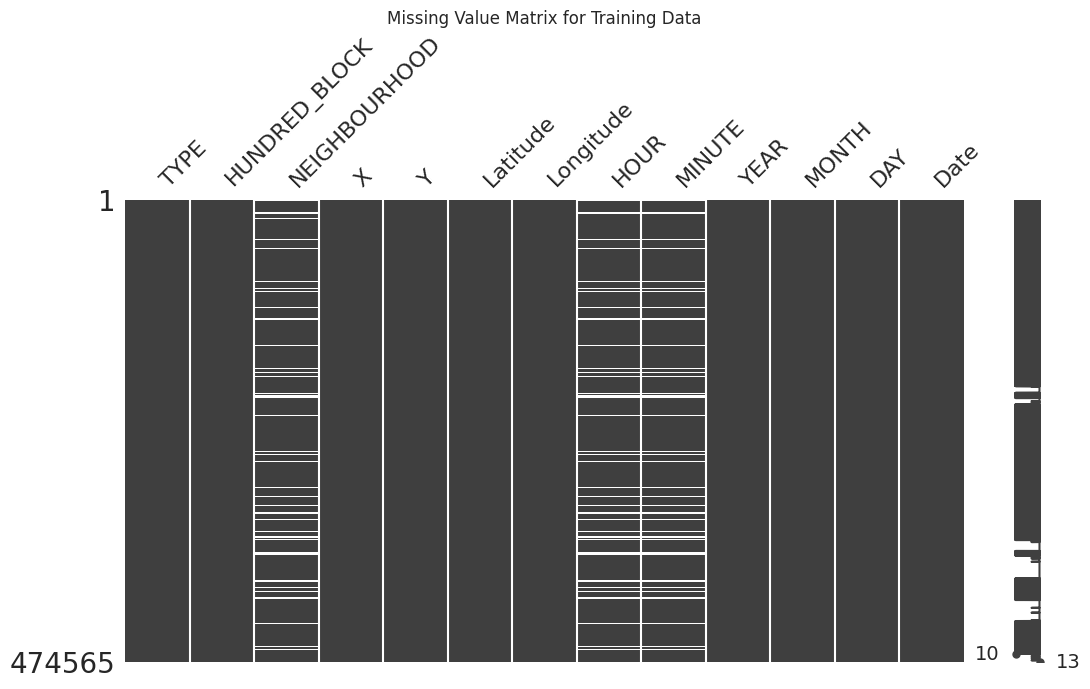


Visualizing Missing Values in df_test_raw:


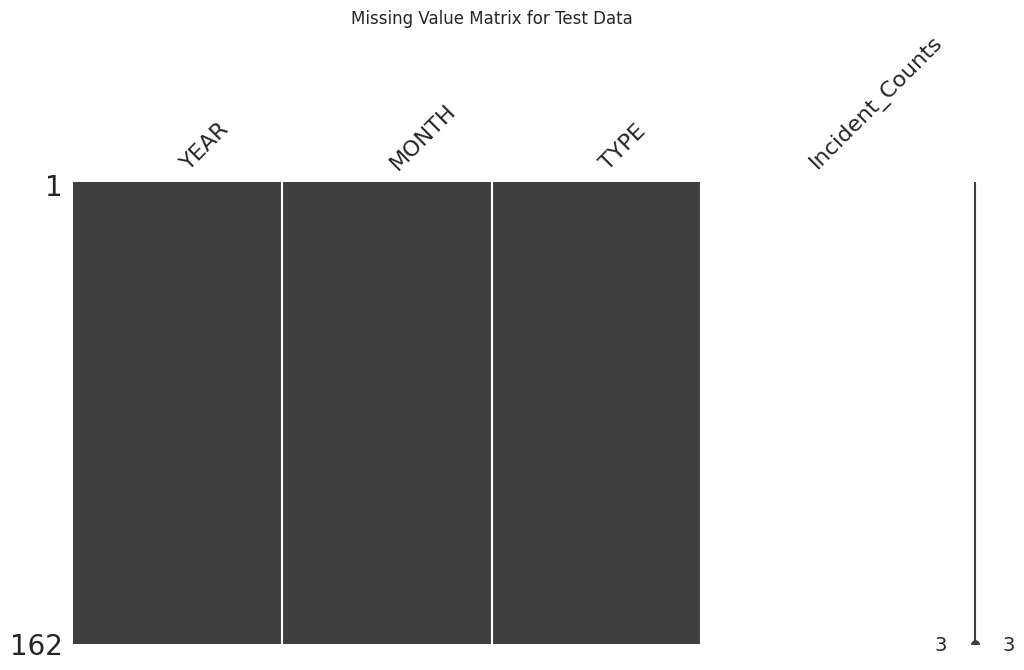


Missing Value Bar Plot for Training Data:


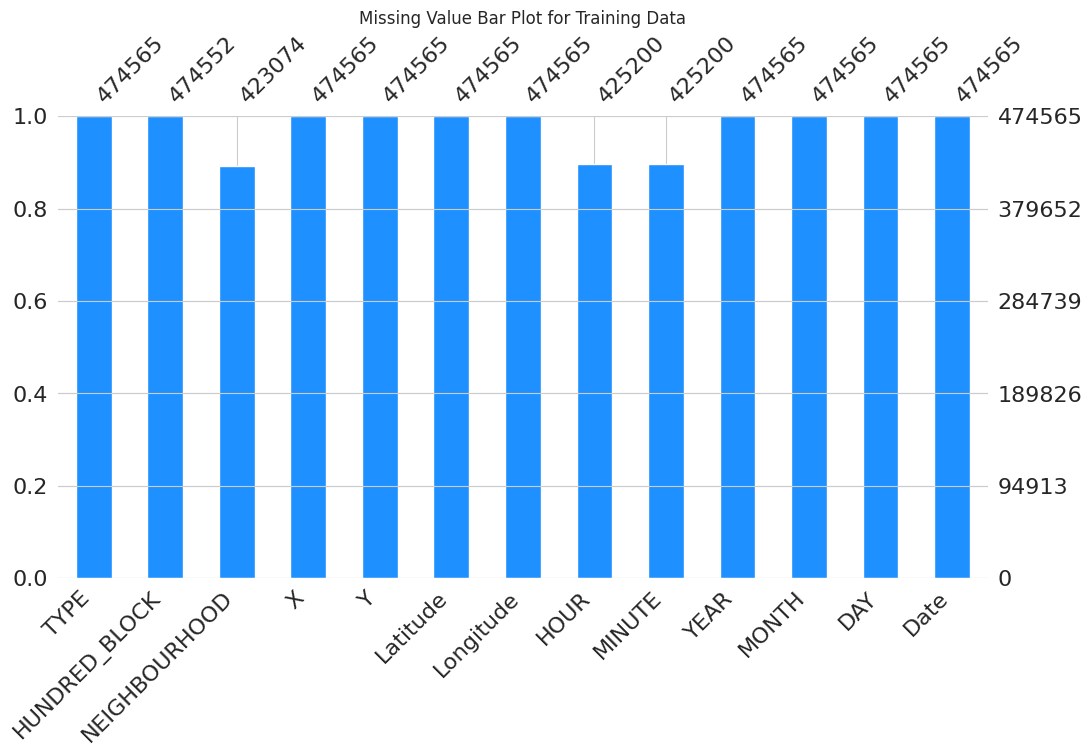


Missing Value Bar Plot for Test Data:


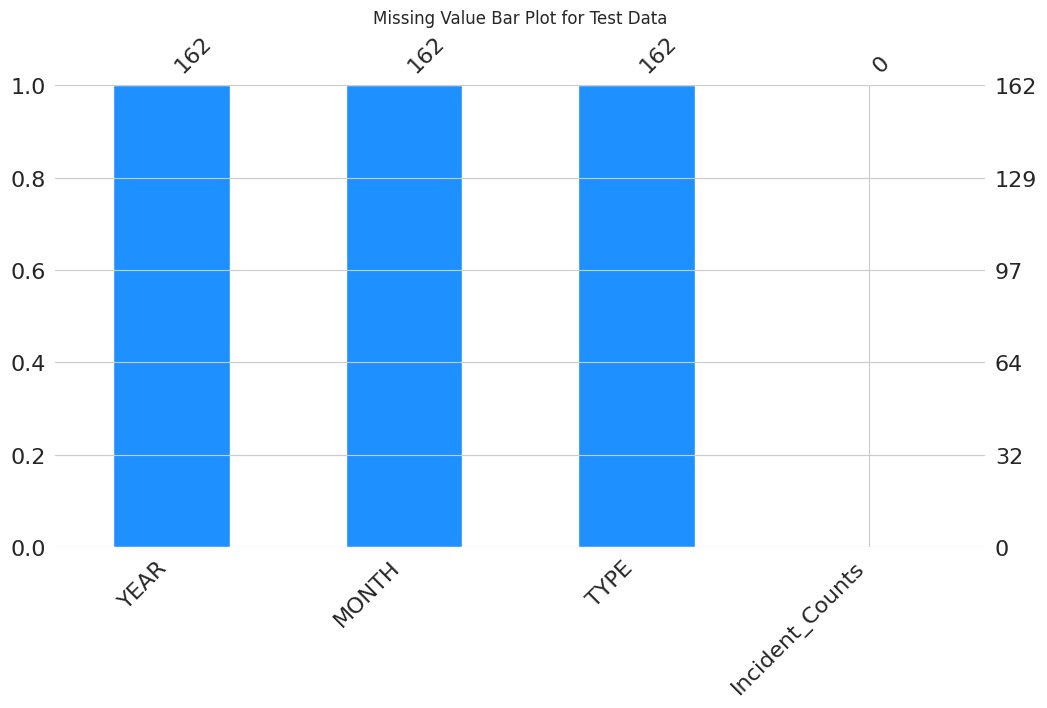

In [ ]:
# Visualizing the missing values
import missingno as msno

# Visualize missing values in df_train_raw
print("\nVisualizing Missing Values in df_train_raw:")
msno.matrix(df_train_raw, figsize=(12, 6))
plt.title('Missing Value Matrix for Training Data')
plt.show()

# Visualize missing values in df_test_raw
print("\nVisualizing Missing Values in df_test_raw:")
msno.matrix(df_test_raw, figsize=(12, 6))
plt.title('Missing Value Matrix for Test Data')
plt.show()

# Optional: Visualize missing values as a bar plot
print("\nMissing Value Bar Plot for Training Data:")
msno.bar(df_train_raw, figsize=(12, 6), color='dodgerblue')
plt.title('Missing Value Bar Plot for Training Data')
plt.show()

print("\nMissing Value Bar Plot for Test Data:")
msno.bar(df_test_raw, figsize=(12, 6), color='dodgerblue')
plt.title('Missing Value Bar Plot for Test Data')
plt.show()

In [ ]:
# Dataset Columns
print("Columns in df_train_raw:")
print(df_train_raw.columns)

print("\nColumns in df_test_raw:")
print(df_test_raw.columns)

Columns in df_train_raw:
Index(['TYPE', 'HUNDRED_BLOCK', 'NEIGHBOURHOOD', 'X', 'Y', 'Latitude',
       'Longitude', 'HOUR', 'MINUTE', 'YEAR', 'MONTH', 'DAY', 'Date'],
      dtype='object')

Columns in df_test_raw:
Index(['YEAR', 'MONTH', 'TYPE', 'Incident_Counts'], dtype='object')


In [ ]:
# Dataset Describe
print("\nDescription of df_train_raw:")
print(df_train_raw.describe())

print("\nDescription of df_test_raw:")
print(df_test_raw.describe())


Description of df_train_raw:
                   X             Y       Latitude      Longitude  \
count  474565.000000  4.745650e+05  474565.000000  474565.000000   
mean   441028.018220  4.889023e+06      44.138029    -110.301025   
min         0.000000  0.000000e+00       0.000000    -124.549757   
25%    489916.530000  5.453572e+06      49.234871    -123.127383   
50%    491477.850000  5.456820e+06      49.264051    -123.107058   
75%    493610.190000  5.458622e+06      49.280300    -123.065646   
max    511303.000000  5.512579e+06      49.755314       0.000000   
std    150295.319332  1.665850e+06      15.039271      37.583147   

                HOUR         MINUTE           YEAR          MONTH  \
count  425200.000000  425200.000000  474565.000000  474565.000000   
mean       13.721263      16.736047    2004.363632       6.555700   
min         0.000000       0.000000    1999.000000       1.000000   
25%         9.000000       0.000000    2001.000000       4.000000   
50%        1

In [ ]:
# Check Unique Values for each variable.
print("\nUnique values in df_train_raw:")
print(df_train_raw.nunique())

print("\nUnique values in df_test_raw:")
print(df_test_raw.nunique())


Unique values in df_train_raw:
TYPE                 9
HUNDRED_BLOCK    20566
NEIGHBOURHOOD       24
X                84225
Y                82768
Latitude         89488
Longitude        87190
HOUR                24
MINUTE              60
YEAR                13
MONTH               12
DAY                 31
Date              4748
dtype: int64

Unique values in df_test_raw:
YEAR                2
MONTH              12
TYPE                9
Incident_Counts     0
dtype: int64


In [ ]:
# Write your code to make your dataset analysis ready.
print("\n--- Initial Data Preparation: Making Raw Training Data Analysis Ready ---")
#Initial Data Preparation for EDA (Minimal Processing)

df_train_raw['Date'] = pd.to_datetime(df_train_raw['Date'])   # Ensures the 'Date' column is in datetime format, crucial for time-series analysis.

# Extract time-based features from the 'Date' column in df_train_raw
if 'Date' in df_train_raw.columns and pd.api.types.is_datetime64_any_dtype(df_train_raw['Date']):
    df_train_raw['YEAR'] = df_train_raw['Date'].dt.year
    df_train_raw['MONTH'] = df_train_raw['Date'].dt.month
    df_train_raw['DAY'] = df_train_raw['Date'].dt.day
    df_train_raw['HOUR'] = df_train_raw['Date'].dt.hour
    df_train_raw['MINUTE'] = df_train_raw['Date'].dt.minute
    df_train_raw['dayofweek'] = df_train_raw['Date'].dt.dayofweek
    print("Extracted YEAR, MONTH, DAY, HOUR, MINUTE features from 'Date' column in df_train_raw.")
else:
    print("Warning: 'Date' column not found or not in datetime format in df_train_raw. Cannot extract time-based features.")

# Assign Latitude and Longitude if X and Y columns are present
if 'X' in df_train_raw.columns and 'Y' in df_train_raw.columns:
    df_train_raw['Latitude'] = df_train_raw['Y']
    df_train_raw['Longitude'] = df_train_raw['X']
    print("Assigned 'Latitude' from 'Y' and 'Longitude' from 'X' columns in df_train_raw.")
else:
    print("Warning: 'X' or 'Y' columns not found in df_train_raw. Cannot assign Latitude/Longitude directly.")


--- Initial Data Preparation: Making Raw Training Data Analysis Ready ---
Extracted YEAR, MONTH, DAY, HOUR, MINUTE features from 'Date' column in df_train_raw.
Assigned 'Latitude' from 'Y' and 'Longitude' from 'X' columns in df_train_raw.



Crime Type Distribution:


<ipython-input-150-0bb796573b35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, y='TYPE', order=df_train_raw['TYPE'].value_counts().index, palette='viridis')  # Creates a bar plot showing the frequency of each crime type.


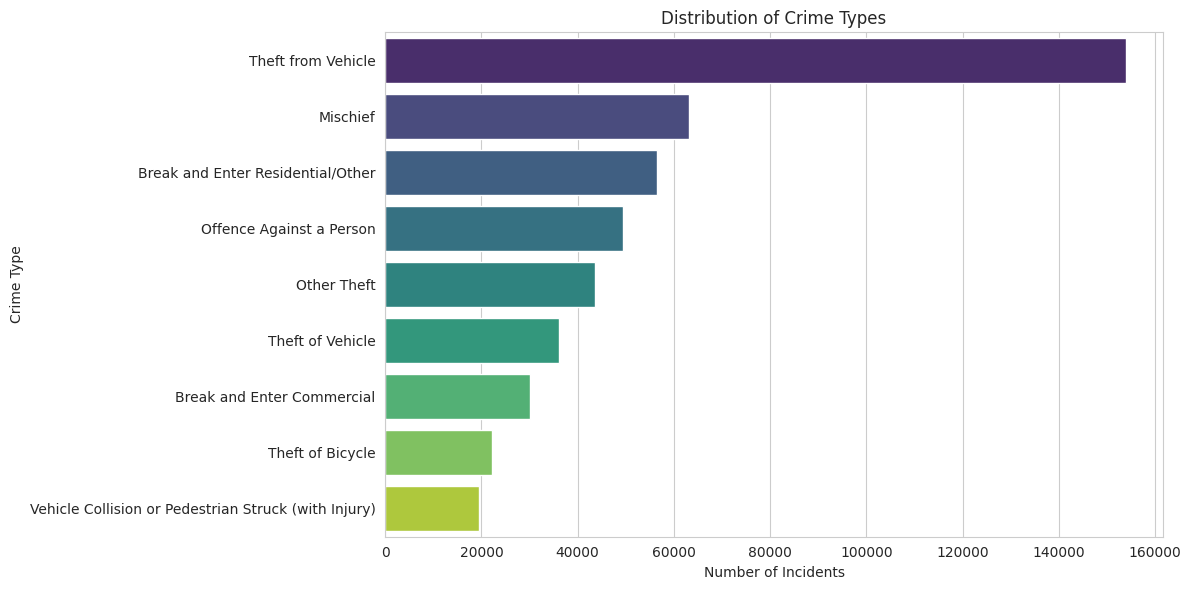

In [ ]:
# Chart - 1 visualization code
# Crime Type Distribution
print("\nCrime Type Distribution:")
if 'TYPE' in df_train_raw.columns and not df_train_raw['TYPE'].isnull().all():
    plt.figure(figsize=(12, 6))                                                                                     # Sets the figure size for the plot.
    sns.countplot(data=df_train_raw, y='TYPE', order=df_train_raw['TYPE'].value_counts().index, palette='viridis')  # Creates a bar plot showing the frequency of each crime type.
    plt.title('Distribution of Crime Types')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Crime Type')
    plt.tight_layout()                                                                                              # Adjusts plot parameters for a tight layout.
    plt.show()
else:
    print("Cannot plot Crime Type Distribution: 'TYPE' column not found or contains only missing values in training data.")


Temporal Crime Trends (Monthly Aggregation):


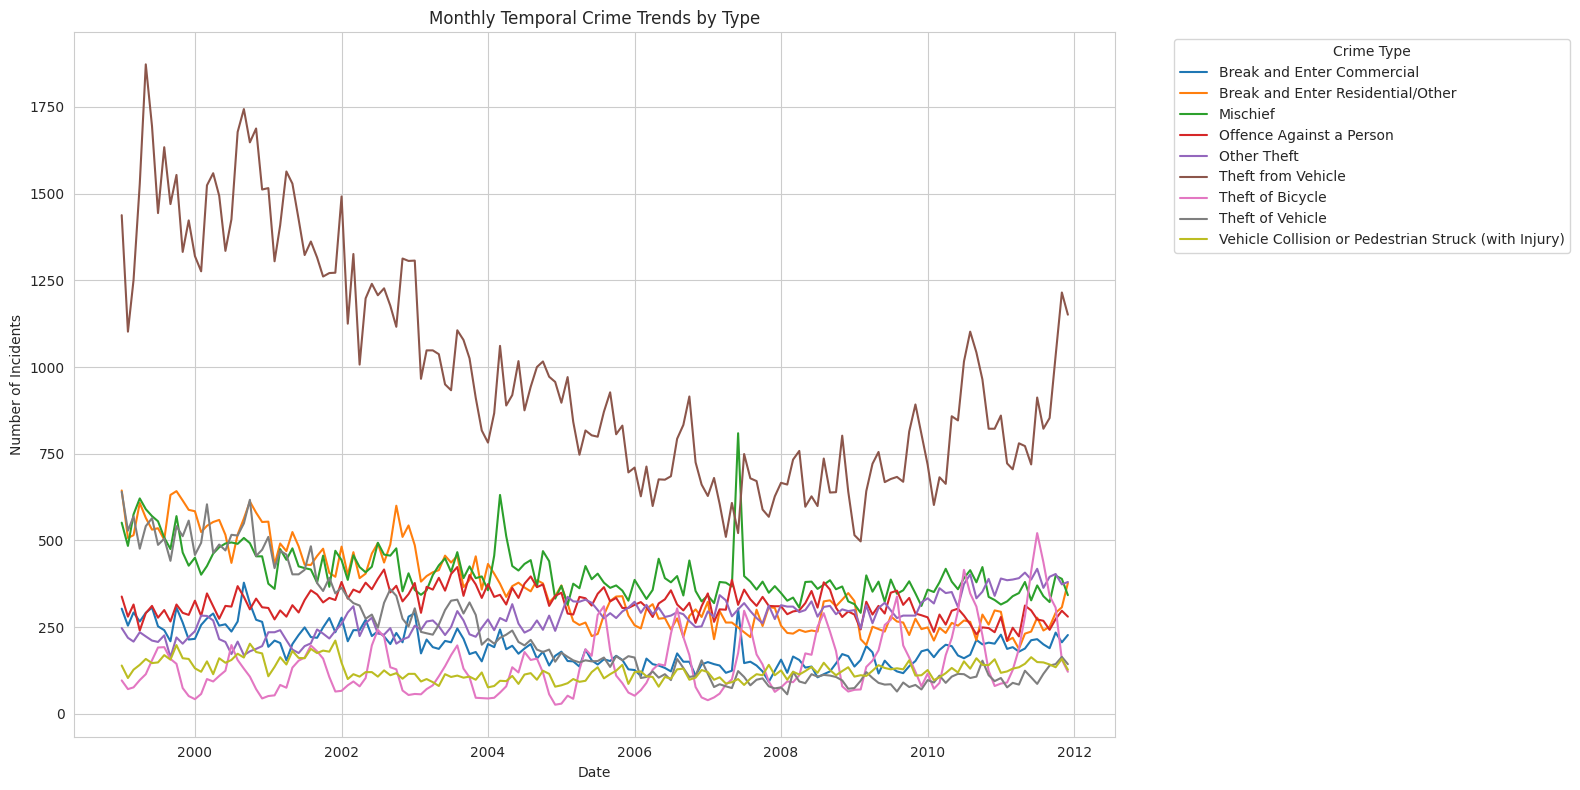

In [ ]:
# Chart - 2 visualization code
# Temporal Crime Trends (Aggregated Monthly): aggregate raw training data to monthly counts for plotting temporal trends
if 'Date' in df_train_raw.columns and 'TYPE' in df_train_raw.columns:
    df_monthly_trends = df_train_raw.groupby([df_train_raw['Date'].dt.to_period('M'), 'TYPE']).size().reset_index(name='Incident_Counts')  # Groups data by month & crime type, then counts incidents.
    df_monthly_trends['Date'] = df_monthly_trends['Date'].dt.to_timestamp() # Converts the Period back to Timestamp for plotting.
    print("\nTemporal Crime Trends (Monthly Aggregation):")
    plt.figure(figsize=(16, 8)) # Sets the figure size.
    # Check if df_monthly_trends is empty before iterating
    if not df_monthly_trends.empty:
        # Loops through each unique crime type to plot its monthly trend.
        for crime_type in df_monthly_trends['TYPE'].unique():
            subset = df_monthly_trends[df_monthly_trends['TYPE'] == crime_type] # Filters data for the current crime type.
            plt.plot(subset['Date'], subset['Incident_Counts'], label=f'{crime_type}') # Plots the trend line.
        plt.title('Monthly Temporal Crime Trends by Type')
        plt.xlabel('Date')
        plt.ylabel('Number of Incidents')
        plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Displays legend outside the plot.
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available in df_monthly_trends for plotting temporal trends.")
else:
    print("Cannot plot Temporal Crime Trends: 'Date' or 'TYPE' column not found in training data.")


Hourly Crime Patterns:


<ipython-input-152-37790dda9946>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=hourly_data, x='HOUR', palette='coolwarm')


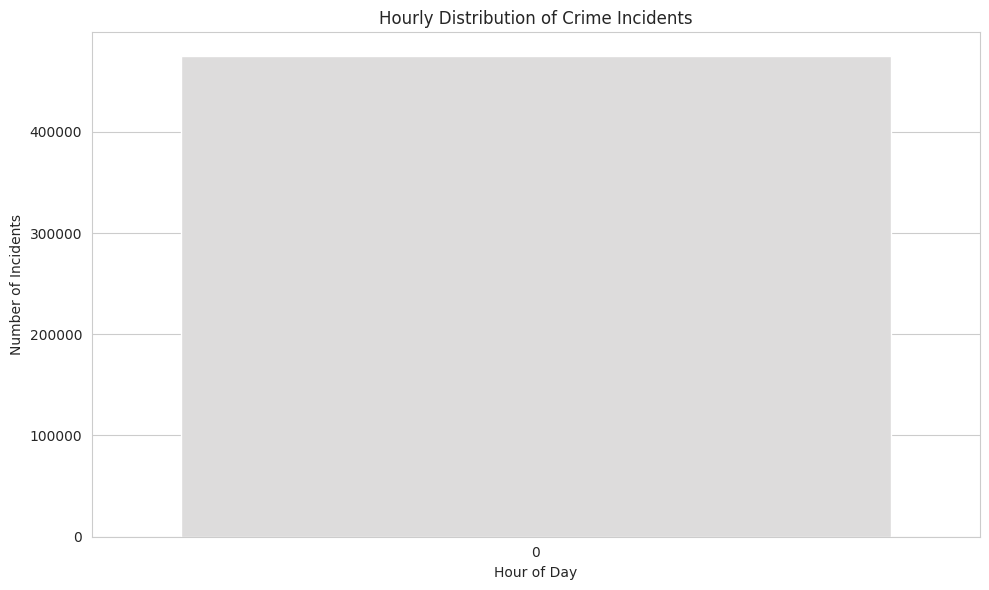

In [ ]:
# Chart - 3 visualization code
# Hourly Crime Patterns -> this cell of code give more appropriate output if data wrangling code is not executed
print("\nHourly Crime Patterns:")
if 'HOUR' in df_train_raw.columns:
    hourly_data = df_train_raw.dropna(subset=['HOUR'])   # Drop NaN values in 'HOUR' before plotting
    if not hourly_data.empty:
        plt.figure(figsize=(10, 6)) # Sets the figure size.
        sns.countplot(data=hourly_data, x='HOUR', palette='coolwarm')
        plt.title('Hourly Distribution of Crime Incidents')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Incidents')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid 'HOUR' data available for plotting.")
else:
    print("'HOUR' column not found in training data.")


Hourly Crime Patterns by Type (Top 5 Types):


<Figure size 1000x600 with 0 Axes>

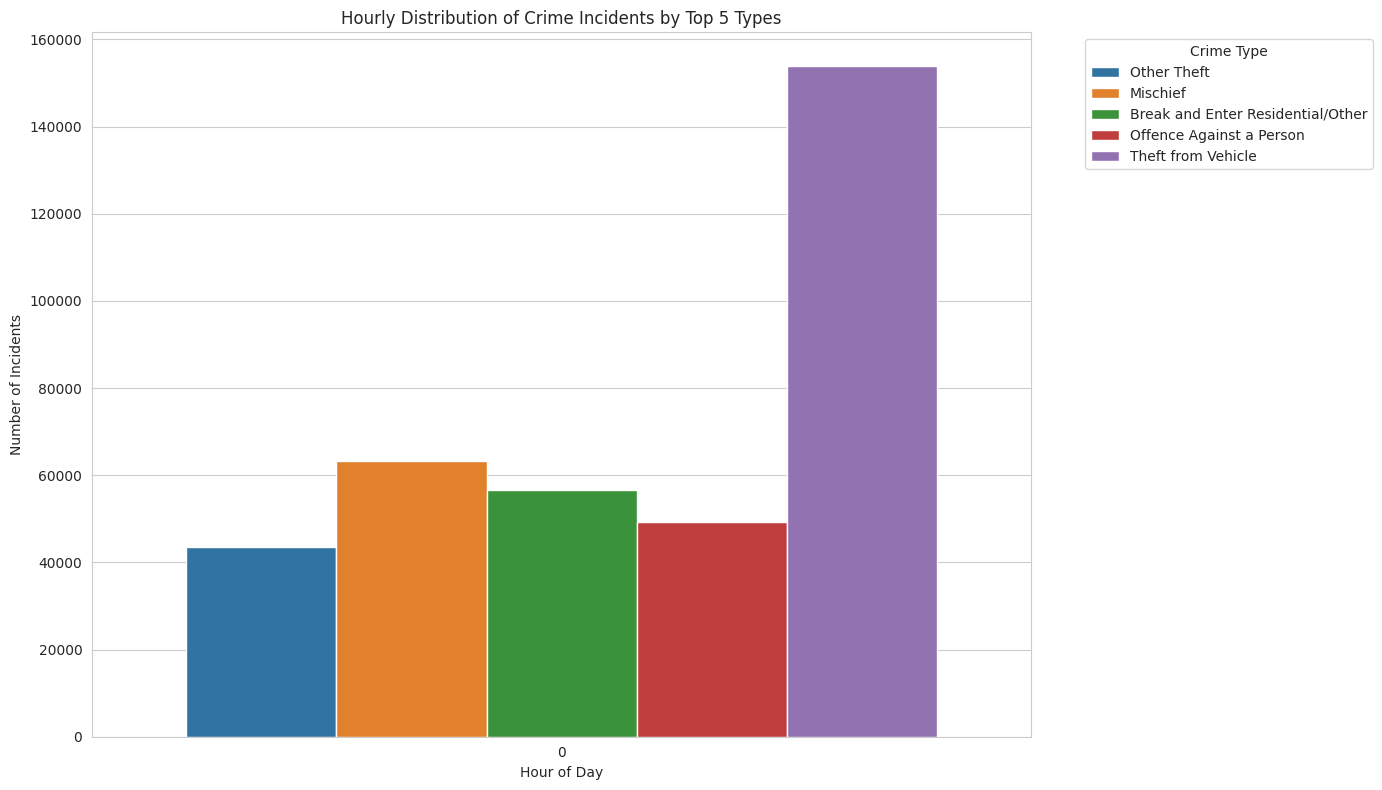

In [ ]:
# Chart - 4 visualization code
if 'HOUR' in df_train_raw.columns:
    hourly_data = df_train_raw.dropna(subset=['HOUR'])   # Drop NaN values in 'HOUR' before plotting
    if not hourly_data.empty:
        plt.figure(figsize=(10, 6))
        # Hourly patterns by crime type
        print("\nHourly Crime Patterns by Type (Top 5 Types):")
        if 'TYPE' in hourly_data.columns:
             hourly_data_with_type = hourly_data.dropna(subset=['TYPE'])
             if not hourly_data_with_type.empty:
                 top_5_types = hourly_data_with_type['TYPE'].value_counts().head(5).index
                 plt.figure(figsize=(14, 8))
                 sns.countplot(data=hourly_data_with_type[hourly_data_with_type['TYPE'].isin(top_5_types)], x='HOUR', hue='TYPE', palette='tab10')
                 plt.title('Hourly Distribution of Crime Incidents by Top 5 Types')
                 plt.xlabel('Hour of Day')
                 plt.ylabel('Number of Incidents')
                 plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
                 plt.tight_layout()
                 plt.show()
             else:
                 print("No hourly data with valid TYPE available for plotting by type.")
        else:
            print("'TYPE' column not found in hourly data for plotting by type.")
    else:
        print("No valid 'HOUR' data available for plotting.")
else:
    print("'HOUR' column not found in training data.")


Monthly Crime Patterns (Aggregated Across Years):


<ipython-input-154-0e7b4d3bad84>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, x='MONTH', palette='plasma')


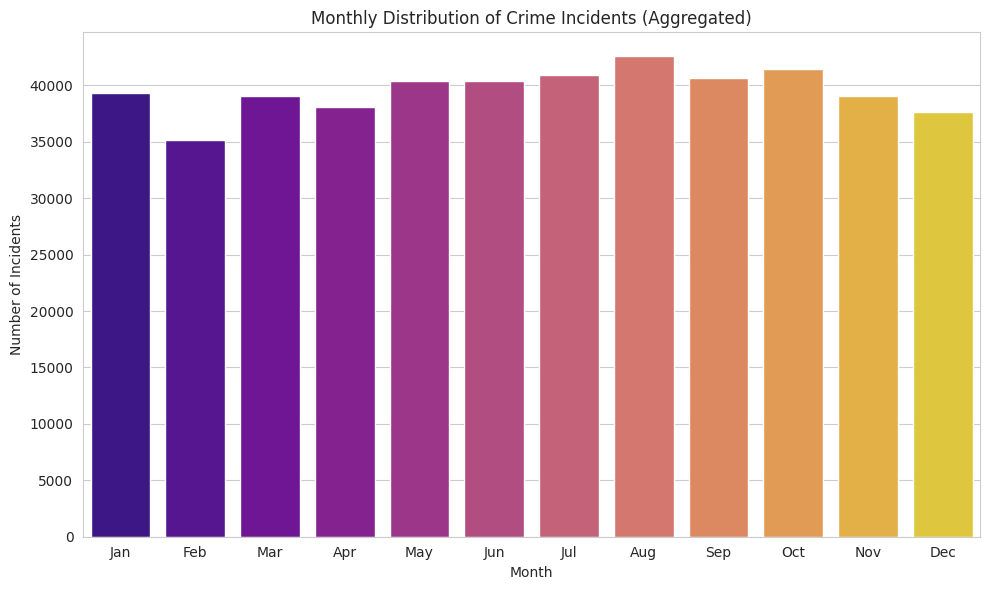

In [ ]:
# Chart - 5 visualization code
# Monthly Crime Patterns (across all years)
print("\nMonthly Crime Patterns (Aggregated Across Years):")
if 'MONTH' in df_train_raw.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train_raw, x='MONTH', palette='plasma')
    plt.title('Monthly Distribution of Crime Incidents (Aggregated)')
    plt.xlabel('Month')
    plt.ylabel('Number of Incidents')
    plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) # Sets x-axis ticks and labels for months.
    plt.tight_layout()
    plt.show()
else:
    print("'MONTH' column not found in training data.")


Monthly Crime Patterns by Type (Top 5 Types):


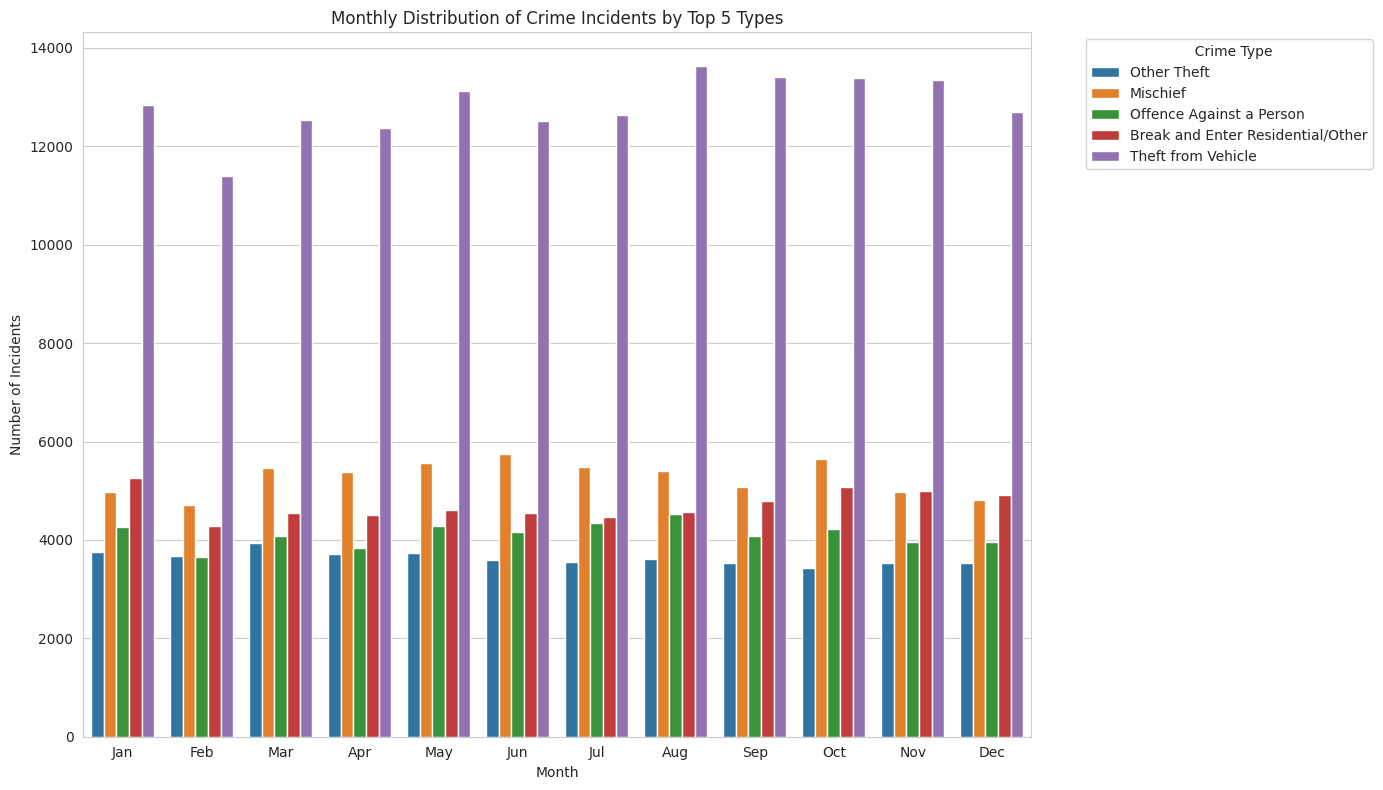

In [ ]:
# Chart - 6 visualization code
# Monthly patterns by crime type
if 'MONTH' in df_train_raw.columns:
    print("\nMonthly Crime Patterns by Type (Top 5 Types):")
    if 'TYPE' in df_train_raw.columns and not df_train_raw['TYPE'].isnull().all():
        top_5_types = df_train_raw['TYPE'].value_counts().head(5).index
        plt.figure(figsize=(14, 8))
        # Plots monthly distribution for top 5 crime types.
        sns.countplot(data=df_train_raw[df_train_raw['TYPE'].isin(top_5_types)], x='MONTH', hue='TYPE', palette='tab10')
        plt.title('Monthly Distribution of Crime Incidents by Top 5 Types')
        plt.xlabel('Month')
        plt.ylabel('Number of Incidents')
        plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.legend(title='  Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
         print("Cannot plot Monthly Crime Patterns by Type: 'TYPE' column not found or contains only missing values in training data.")
else:
    print("'MONTH' column not found in training data.")


Neighbourhood Distribution:


<ipython-input-156-b257228a807e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, y='NEIGHBOURHOOD', order=df_train_raw['NEIGHBOURHOOD'].value_counts().index, palette='cividis')


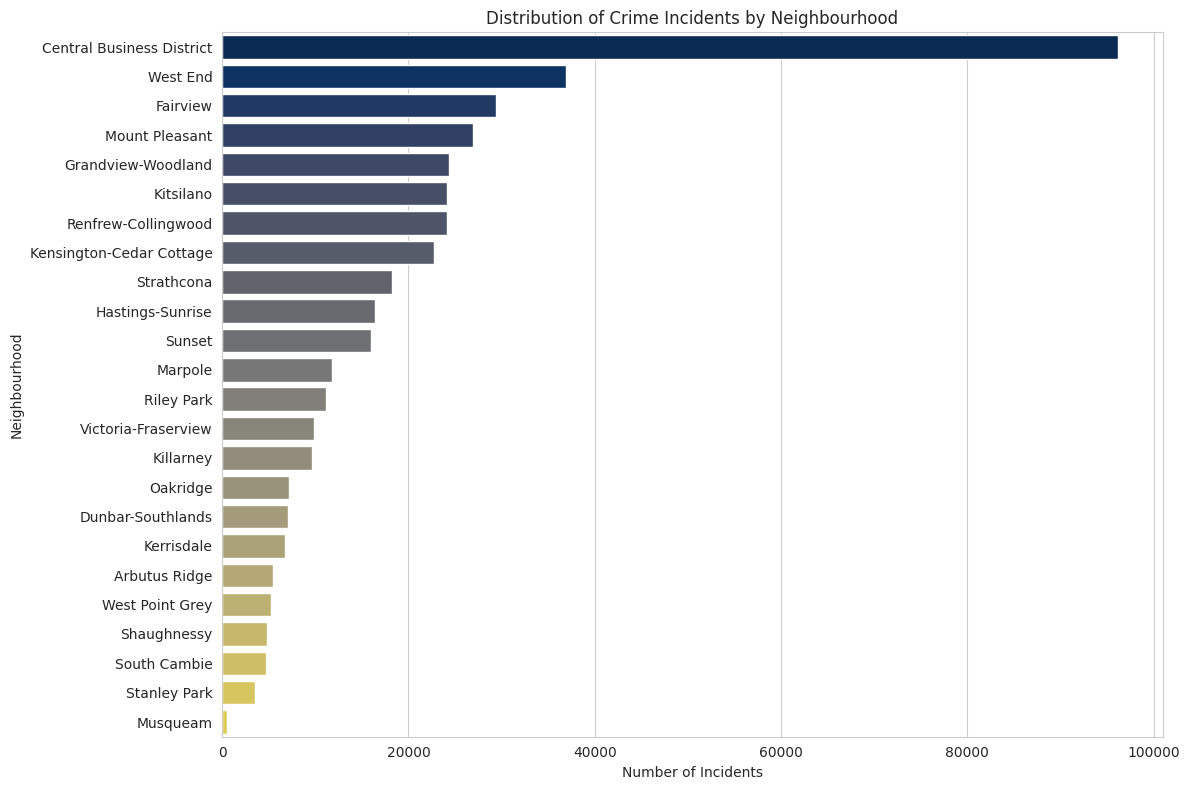

In [ ]:
# Chart - 7 visualization code
#Neighbourhood Distribution
print("\nNeighbourhood Distribution:")
if 'NEIGHBOURHOOD' in df_train_raw.columns and not df_train_raw['NEIGHBOURHOOD'].isnull().all():
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_train_raw, y='NEIGHBOURHOOD', order=df_train_raw['NEIGHBOURHOOD'].value_counts().index, palette='cividis')
    plt.title('Distribution of Crime Incidents by Neighbourhood')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Neighbourhood')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Neighbourhood Distribution: 'NEIGHBOURHOOD' column not found or contains only missing values.")


In [ ]:
# Chart - 8 visualization code
#Hundred Block Distribution
print("\nHundred Block Distribution:")
if 'HUNDRED_BLOCK' in df_train_raw.columns and not df_train_raw['HUNDRED_BLOCK'].isnull().all():
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_train_raw, y='HUNDRED_BLOCK', order=df_train_raw['HUNDRED_BLOCK'].value_counts().index, palette='magma')
    plt.title('Distribution of Crime Incidents by Hundred Block')
    plt.xlabel('Number of Incidents')
    plt.ylabel('Hundred Block')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Hundred Block Distribution: 'HUNDRED_BLOCK' column not found or contains only missing values.")



Hundred Block Distribution:


<ipython-input-157-46268ee3ea7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, y='HUNDRED_BLOCK', order=df_train_raw['HUNDRED_BLOCK'].value_counts().index, palette='magma')


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f8e65eebe20> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f8e65ee9760> (for post_execute):


KeyboardInterrupt: 


Yearly Crime Distribution:


<ipython-input-159-d4545194cfad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, x='YEAR', palette='cubehelix')


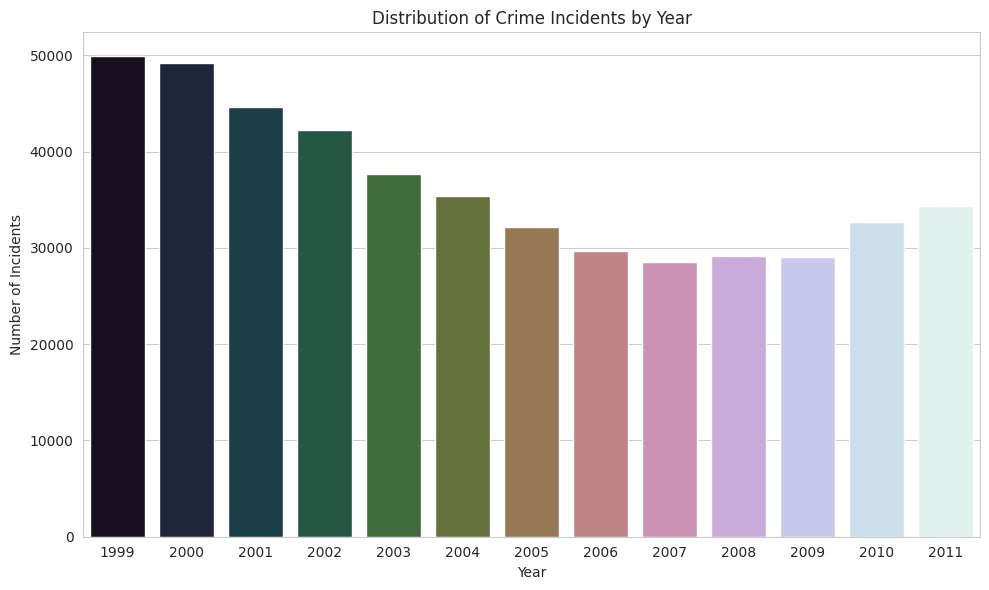

In [ ]:
# Chart - 9 visualization code
#Yearly Crime Distribution
print("\nYearly Crime Distribution:")
if 'YEAR' in df_train_raw.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_train_raw, x='YEAR', palette='cubehelix')
    plt.title('Distribution of Crime Incidents by Year')
    plt.xlabel('Year')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Yearly Crime Distribution: 'YEAR' column not found.")


Daily Crime Distribution (Day of Month):


<ipython-input-89-2311edce52d1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train_raw, x='DAY', palette='rocket')


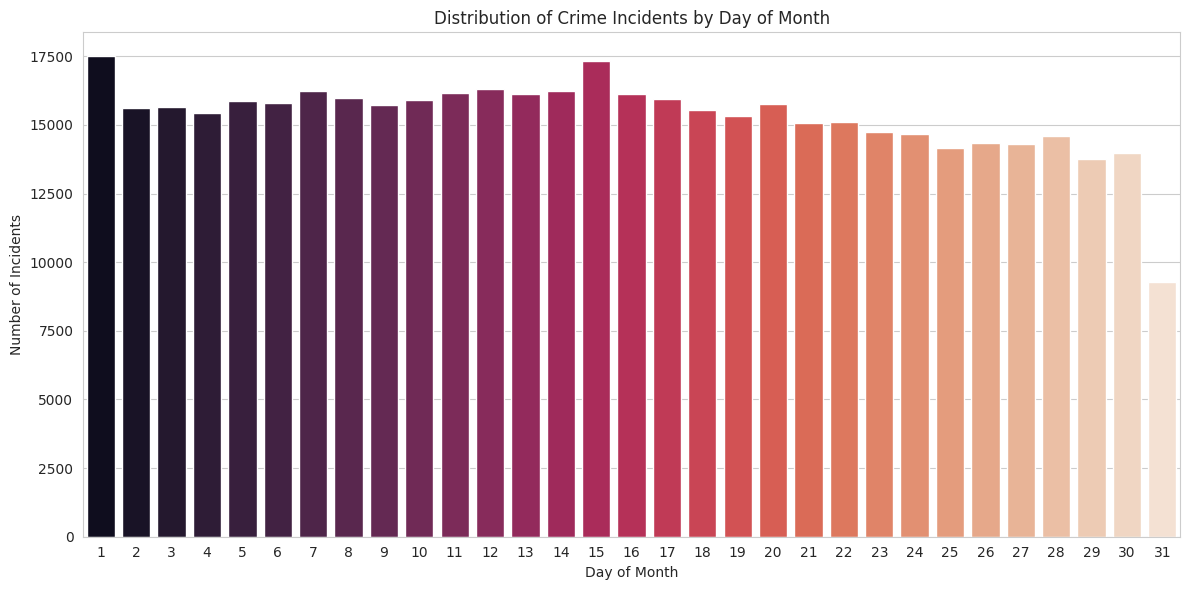

In [ ]:
# Chart - 10 visualization code
#Daily Crime Distribution (Day of Month)
print("\nDaily Crime Distribution (Day of Month):")
if 'DAY' in df_train_raw.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_train_raw, x='DAY', palette='rocket')
    plt.title('Distribution of Crime Incidents by Day of Month')
    plt.xlabel('Day of Month')
    plt.ylabel('Number of Incidents')
    plt.tight_layout()
    plt.show()
else:
    print("Cannot plot Daily Crime Distribution: 'DAY' column not found.")


Day of Week Crime Patterns:


<ipython-input-90-14afda079d0e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dayofweek_data, x='dayofweek', palette='crest')


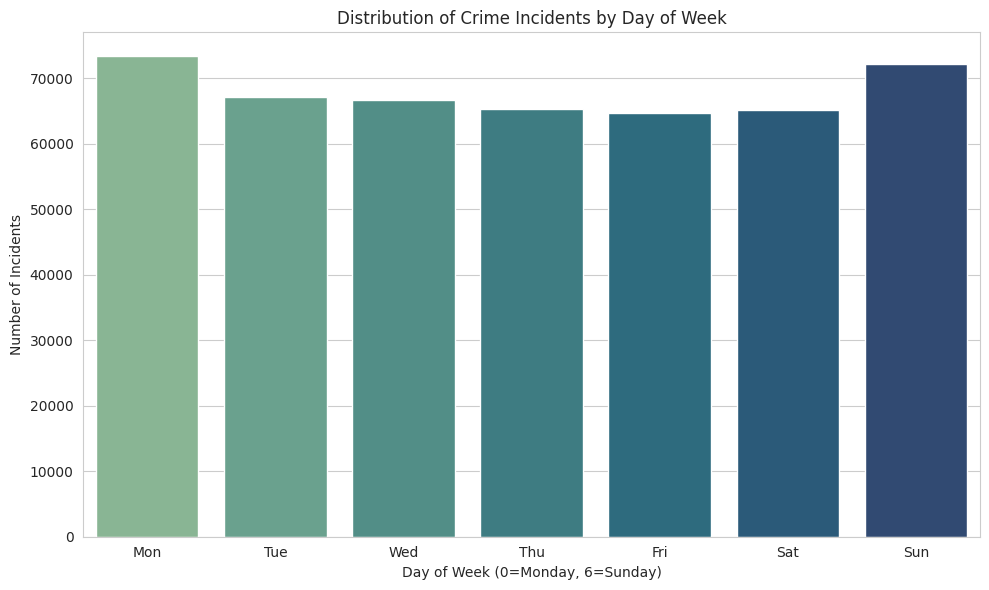

In [ ]:
# Chart - 11 visualization code
#Day of Week Crime Patterns
print("\nDay of Week Crime Patterns:")
if 'dayofweek' in df_train_raw.columns:
    dayofweek_data = df_train_raw.dropna(subset=['dayofweek'])
    if not dayofweek_data.empty:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=dayofweek_data, x='dayofweek', palette='crest')
        plt.title('Distribution of Crime Incidents by Day of Week')
        plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
        plt.ylabel('Number of Incidents')
        plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.tight_layout()
        plt.show()
    else:
        print("No valid 'dayofweek' data available for plotting.")
else:
    print("'dayofweek' column not found in training data.")


Hourly Crime Patterns by Day of Week (Heatmap):


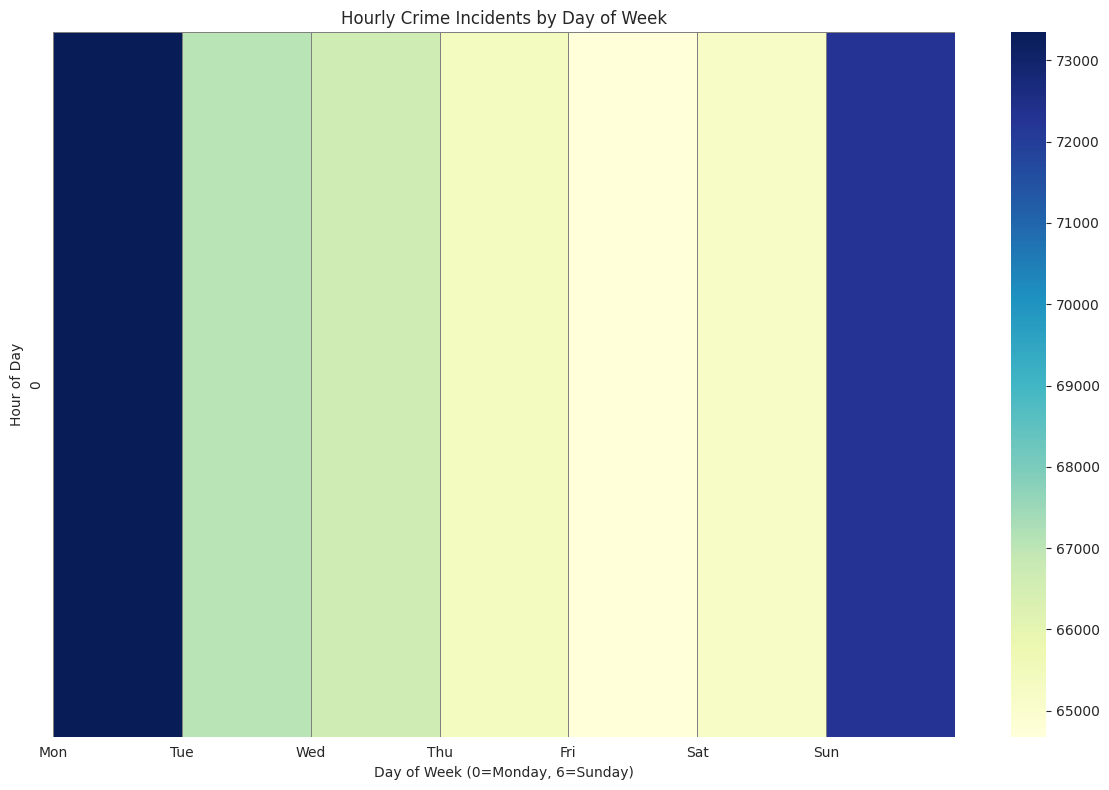

In [ ]:
# Chart - 12 visualization code
#Hourly Crime Patterns by Day of Week (Heatmap)
print("\nHourly Crime Patterns by Day of Week (Heatmap):")
if 'HOUR' in df_train_raw.columns and 'dayofweek' in df_train_raw.columns:
    # Create a pivot table for counts of incidents per hour and day of week
    hourly_dayofweek_pivot = df_train_raw.pivot_table(index='HOUR', columns='dayofweek', aggfunc='size', fill_value=0)
    if not hourly_dayofweek_pivot.empty:
        plt.figure(figsize=(12, 8))
        sns.heatmap(hourly_dayofweek_pivot, cmap='YlGnBu', fmt='d', linewidths=.5, linecolor='gray')
        plt.title('Hourly Crime Incidents by Day of Week')
        plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
        plt.ylabel('Hour of Day')
        plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        plt.tight_layout()
        plt.show()
    else:
        print("No data to generate hourly by day of week heatmap.")
else:
    print("'HOUR' or 'dayofweek' columns not found in training data for heatmap.")



Crime Type vs. Hour (Grouped Bar Plot):


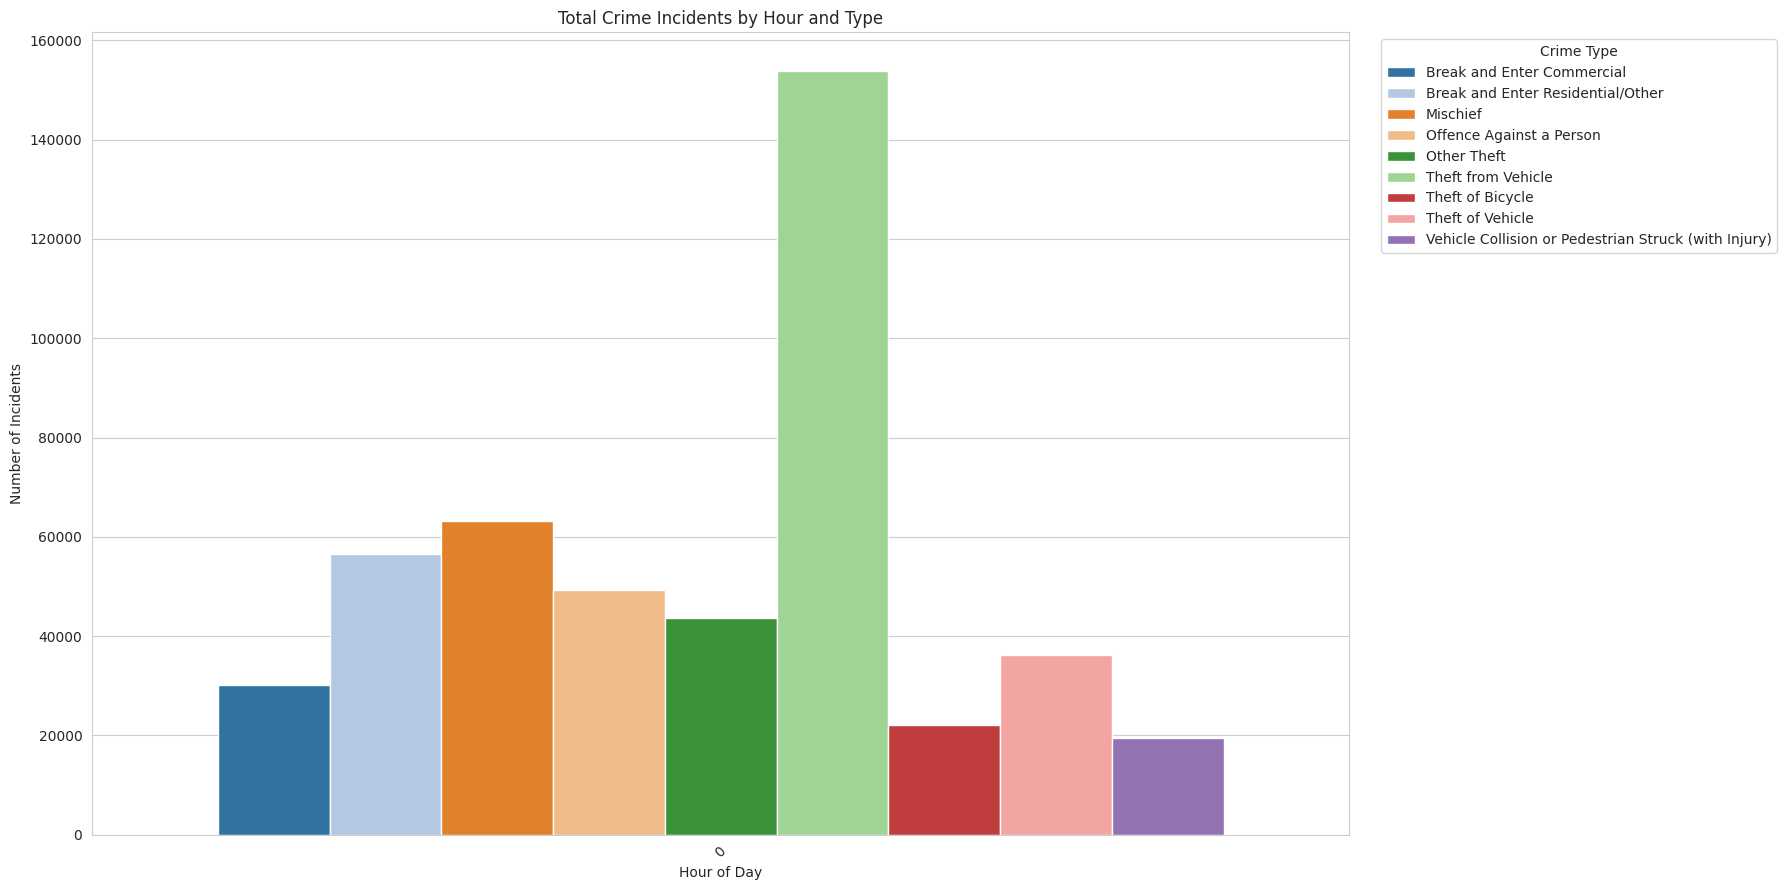

In [ ]:
# Chart - 13 visualization code
#Crime Type vs. Hour (Grouped Bar Plot)
print("\nCrime Type vs. Hour (Grouped Bar Plot):")
if 'HOUR' in df_train_raw.columns and 'TYPE' in df_train_raw.columns:
    plot_data = df_train_raw.dropna(subset=['HOUR', 'TYPE'])
    if not plot_data.empty:
        # Aggregate data to count incidents by hour and type
        hourly_type_counts = plot_data.groupby(['HOUR', 'TYPE']).size().reset_index(name='Incident_Counts')
        plt.figure(figsize=(18, 9)) # Adjust figure size for better readability
        sns.barplot(data=hourly_type_counts, x='HOUR', y='Incident_Counts', hue='TYPE', palette='tab20')
        plt.title('Total Crime Incidents by Hour and Type')
        plt.xlabel('Hour of Day')
        plt.ylabel('Number of Incidents')
        plt.legend(title='Crime Type', bbox_to_anchor=(1.02, 1), loc='upper left')
        plt.xticks(rotation=45) # Rotate x-axis labels if they overlap
        plt.tight_layout()
        plt.show()
    else:
        print("No valid 'HOUR' or 'TYPE' data available for plotting Crime Type vs. Hour.")
else:
    print("'HOUR' or 'TYPE' columns not found in training data for Crime Type vs. Hour plot.")



--- Correlation Heatmap of Numerical Features ---


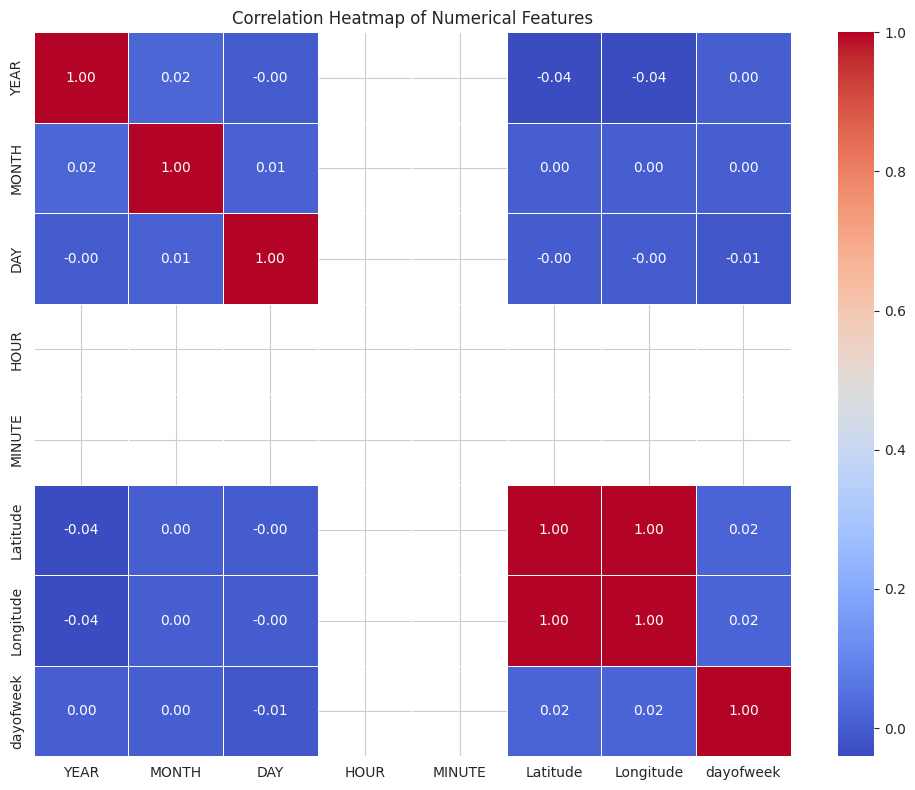

In [ ]:
# Correlation Heatmap visualization code
print("\n--- Correlation Heatmap of Numerical Features ---")
# Select numerical columns for correlation calculation
numerical_cols = ['YEAR', 'MONTH', 'DAY', 'HOUR', 'MINUTE', 'Latitude', 'Longitude', 'dayofweek']
# Filter columns that actually exist in the DataFrame
existing_numerical_cols = [col for col in numerical_cols if col in df_train_raw.columns]

if existing_numerical_cols:
    # Drop rows with NaNs in selected columns for correlation calculation to avoid issues
    df_corr = df_train_raw[existing_numerical_cols].dropna()
    if not df_corr.empty:
        correlation_matrix = df_corr.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
        plt.title('Correlation Heatmap of Numerical Features')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid numerical data after dropping NaNs for correlation heatmap.")
else:
    print("No relevant numerical columns found for correlation heatmap.")


--- Pair Plot of Selected Numerical Features ---


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

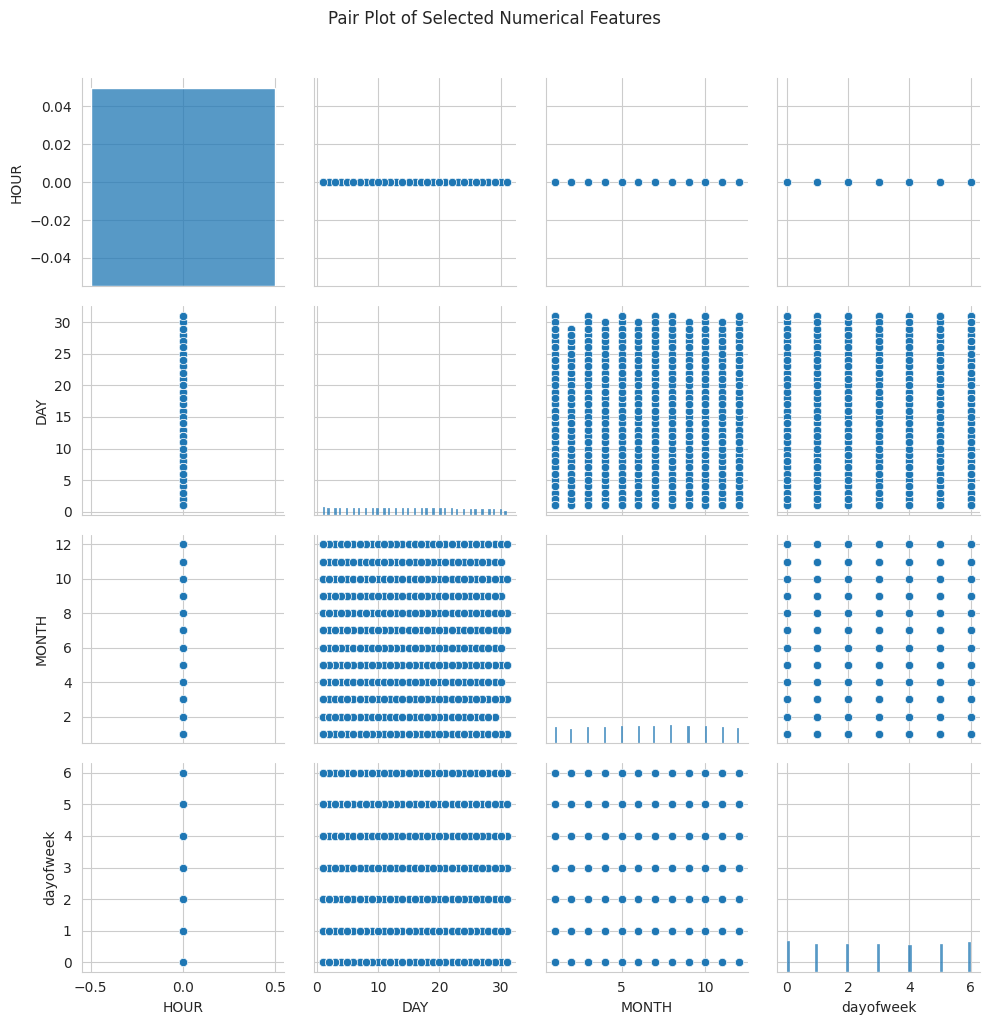

In [ ]:
# Pair Plot visualization code
print("\n--- Pair Plot of Selected Numerical Features ---")
# Select a subset of numerical columns for the pair plot
# Avoid including too many features to keep the plot readable and performant
pair_plot_cols = ['HOUR', 'DAY', 'MONTH', 'dayofweek'] # Using time-based features
# Optionally, add 'Latitude' and 'Longitude' if their distributions are important and won't clutter too much
# pair_plot_cols.extend(['Latitude', 'Longitude'])

existing_pair_plot_cols = [col for col in pair_plot_cols if col in df_train_raw.columns]

if existing_pair_plot_cols:
    # Drop rows with NaNs in selected columns for the pair plot
    df_pair_plot = df_train_raw[existing_pair_plot_cols].dropna()
    if not df_pair_plot.empty:
        # Adding 'TYPE' as hue might make it very busy depending on unique types
        # Keeping it simple for now, can be added if requested later.
        sns.pairplot(df_pair_plot, palette='viridis')
        plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02) # Adjust suptitle position
        plt.tight_layout()
        plt.show()
    else:
        print("No valid numerical data after dropping NaNs for pair plot.")
else:
    print("No relevant numerical columns found for pair plot.")

In [ ]:
#############################################  HYPOTHESIS 1  ########################################


# Perform Statistical Test to obtain P-Value

print("Hypothesis 1: Distribution of Incidents by Hour")

print("    Null Hypothesis ($H_0$): The number of crime incidents is uniformly distributed across all hours of the day.")
print("    Alternative Hypothesis ($H_1$): The number of crime incidents is not uniformly distributed across all hours of the day.")

if 'HOUR' in df_train_raw.columns:
    # Prepare observed frequencies
    observed_frequencies = df_train_raw['HOUR'].value_counts().sort_index()
    # Ensure all 24 hours are represented, even if 0 incidents
    all_hours = pd.Series(0, index=range(24))
    observed_frequencies = all_hours.add(observed_frequencies, fill_value=0)

    # Calculate expected frequencies for a uniform distribution
    total_incidents = observed_frequencies.sum()
    expected_frequency_per_hour = total_incidents / 24.0
    expected_frequencies = pd.Series(expected_frequency_per_hour, index=range(24))

    # Drop any hours with 0 observed incidents from both series if they were not in the original data to avoid issues.
    # However, for goodness-of-fit, keeping all 24 hours is appropriate, just make sure counts are integers.
    observed_frequencies_array = observed_frequencies.values
    expected_frequencies_array = expected_frequencies.values

    # Ensure no zero expected frequencies, which can cause issues with chi-squared.
    # If any expected frequency is zero, it implies that category is impossible under null, which is fine,
    # but the scipy implementation might have issues with it. Let's ensure non-zero expecteds for safety.
    # A common practice is to combine categories or adjust very small expected counts if needed.
    # For a uniform distribution, expected_frequency_per_hour should not be zero unless total_incidents is zero.
    if total_incidents > 0 and (expected_frequencies_array == 0).any():
        print("Warning: Some expected frequencies are zero. Chi-squared test might be unreliable. Adjusting minimal expected values.")
        expected_frequencies_array[expected_frequencies_array == 0] = 1e-9 # Small epsilon

    # Perform Chi-squared Goodness-of-Fit test
    chi2_stat, p_value_h1 = stats.chisquare(f_obs=observed_frequencies_array, f_exp=expected_frequencies_array)
    print("P-value obtained:", p_value_h1)

else:
    print("Cannot perform Hypothesis 1: 'HOUR' column not found in training data.")
print("-" * 20)

Hypothesis 1: Distribution of Incidents by Hour
    Null Hypothesis ($H_0$): The number of crime incidents is uniformly distributed across all hours of the day.
    Alternative Hypothesis ($H_1$): The number of crime incidents is not uniformly distributed across all hours of the day.
P-value obtained: 0.0
--------------------


In [ ]:
# Hypothesis 2: Difference in Incidents between Two Most Frequent Neighbourhoods
print("\nHypothesis 2: Difference in Incidents between Two Most Frequent Neighbourhoods")
print("Null Hypothesis ( H0 ): The mean daily crime incidents are equal between the two most frequent neighborhoods.\n \
Alternative Hypothesis ( H1 ): The mean daily crime incidents are not equal between the two most frequent neighborhoods.")

if 'NEIGHBOURHOOD' in df_train_raw.columns and not df_train_raw['NEIGHBOURHOOD'].isnull().all():
    # Find the two most frequent neighborhoods
    top_neighborhoods = df_train_raw['NEIGHBOURHOOD'].value_counts().head(2).index.tolist()

    if len(top_neighborhoods) == 2:
        neighborhood1 = top_neighborhoods[0]
        neighborhood2 = top_neighborhoods[1]

        # Filter data for these two neighborhoods, dropping any NaNs in 'Date'
        df_nh1 = df_train_raw[df_train_raw['NEIGHBOURHOOD'] == neighborhood1].dropna(subset=['Date'])
        df_nh2 = df_train_raw[df_train_raw['NEIGHBOURHOOD'] == neighborhood2].dropna(subset=['Date'])

        # Aggregate to daily incident counts for each neighborhood
        # Use .dt.date to group by date only, dropping time component
        daily_incidents_nh1 = df_nh1.groupby(df_nh1['Date'].dt.date).size().dropna()
        daily_incidents_nh2 = df_nh2.groupby(df_nh2['Date'].dt.date).size().dropna()

        if not daily_incidents_nh1.empty and not daily_incidents_nh2.empty:
            # Perform Independent Samples t-test (Welch's t-test, not assuming equal variances)
            # Welch's t-test (equal_var=False) is more robust when sample sizes or variances are unequal.
            t_stat, p_value_h2 = stats.ttest_ind(daily_incidents_nh1, daily_incidents_nh2, equal_var=False)
            print("P-value obtained:", p_value_h2)



Hypothesis 2: Difference in Incidents between Two Most Frequent Neighbourhoods
Null Hypothesis ( H0 ): The mean daily crime incidents are equal between the two most frequent neighborhoods.
 Alternative Hypothesis ( H1 ): The mean daily crime incidents are not equal between the two most frequent neighborhoods.
P-value obtained: 0.0


In [ ]:
#############################################  HYPOTHESIS 3  ########################################

# Perform Statistical Test to obtain P-Value

print("\nHypothesis 3: Difference in Incidents Across Multiple Crime Types")

print("    Null Hypothesis ($H_0$): The mean daily crime incidents are equal across the top N crime types.")
print("    Alternative Hypothesis ($H_1$): At least one of the top N crime types has a different mean daily crime incidents compared to the others.")

if 'TYPE' in df_train_raw.columns and not df_train_raw['TYPE'].isnull().all():
    # Let's consider the top 3 crime types for this ANOVA test for a clear comparison
    top_n_crime_types = df_train_raw['TYPE'].value_counts().head(3).index.tolist()

    if len(top_n_crime_types) >= 2: # ANOVA requires at least two groups, but typically used for 3+
        # Collect daily incident counts for each of the top crime types
        crime_type_data_for_anova = []
        for crime_type in top_n_crime_types:
            # Filter data for the current crime type, dropping NaNs in 'Date'
            df_type = df_train_raw[df_train_raw['TYPE'] == crime_type].dropna(subset=['Date'])
            daily_incidents_type = df_type.groupby(df_type['Date'].dt.date).size().dropna()
            if not daily_incidents_type.empty:
                crime_type_data_for_anova.append(daily_incidents_type.values)
            else:
                print(f"Warning: No valid daily incident data for crime type '{crime_type}'. Skipping this group for ANOVA.")

        # Check if we have at least two groups with data for ANOVA
        if len(crime_type_data_for_anova) >= 2:
            # Perform One-Way ANOVA test
            # f_stat: F-statistic, p_value_h3: p-value
            f_stat, p_value_h3 = stats.f_oneway(*crime_type_data_for_anova)
            print("P-value obtained:", p_value_h3)

        else:
            print("Cannot perform Hypothesis 3: Not enough valid crime types with daily incident data to perform ANOVA.")
    else:
        print("Cannot perform Hypothesis 3: Less than two unique crime types found in the dataset to compare.")
else:
    print("Cannot perform Hypothesis 3: 'TYPE' column not found or contains only missing values in training data.")
print("-" * 20)



Hypothesis 3: Difference in Incidents Across Multiple Crime Types
    Null Hypothesis ($H_0$): The mean daily crime incidents are equal across the top N crime types.
    Alternative Hypothesis ($H_1$): At least one of the top N crime types has a different mean daily crime incidents compared to the others.
P-value obtained: 0.0
--------------------


In [ ]:
#Data Clean-up + Aggregation
print("Data Clean-up + Aggregation")

# Handle missing values
initial_dropna_cols_for_modeling = ['Date', 'TYPE', 'YEAR', 'MONTH']
rows_before_modeling_dropna = len(df_train_raw)
df_train_raw.dropna(subset=initial_dropna_cols_for_modeling, inplace=True)
rows_after_modeling_dropna = len(df_train_raw)
print(f"Dropped {rows_before_modeling_dropna - rows_after_modeling_dropna} rows with missing values in essential columns for modeling: \
{initial_dropna_cols_for_modeling}.")

df_train_agg = df_train_raw.groupby(['YEAR', 'MONTH', 'TYPE']).size().reset_index(name='Incident_Counts')
df_train_agg['Date'] = pd.to_datetime(df_train_agg['YEAR'].astype(str) + '-' + df_train_agg['MONTH'].astype(str) + '-01')
df_train_agg = df_train_agg.set_index(['Date', 'TYPE']).sort_index()

print("\nAggregated training data info (df_train_agg):")
df_train_agg.info()
print("\nFirst 5 rows of aggregated training data (df_train_agg):")
print(df_train_agg.head())

Data Clean-up + Aggregation
Dropped 0 rows with missing values in essential columns for modeling: ['Date', 'TYPE', 'YEAR', 'MONTH'].

Aggregated training data info (df_train_agg):
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1404 entries, (Timestamp('1999-01-01 00:00:00'), 'Break and Enter Commercial') to (Timestamp('2011-12-01 00:00:00'), 'Vehicle Collision or Pedestrian Struck (with Injury)')
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   YEAR             1404 non-null   int32
 1   MONTH            1404 non-null   int32
 2   Incident_Counts  1404 non-null   int64
dtypes: int32(2), int64(1)
memory usage: 31.8+ KB

First 5 rows of aggregated training data (df_train_agg):
                                              YEAR  MONTH  Incident_Counts
Date       TYPE                                                           
1999-01-01 Break and Enter Commercial         1999      1              303
           B

In [ ]:
# Handling Outliers & Outlier treatments
# Outliers Handling in Aggregated Data (on 'Incident_Counts')
print("\nOutliers Handling in Aggregated Data (on 'Incident_Counts') for modeling:")
Q1 = df_train_agg['Incident_Counts'].quantile(0.25)
Q3 = df_train_agg['Incident_Counts'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before_capping = df_train_agg[(df_train_agg['Incident_Counts'] < lower_bound) | (df_train_agg['Incident_Counts'] > upper_bound)].copy()
outliers_count = len(outliers_before_capping)
print(f"Number of outliers detected (outside 1.5*IQR) in df_train_agg: {outliers_count}")

if outliers_count > 0:
    print("Example of outliers (first 5) in df_train_agg:")
    print(outliers_before_capping.head())
    df_train_agg['Incident_Counts'] = np.where(df_train_agg['Incident_Counts'] < lower_bound, lower_bound, df_train_agg['Incident_Counts'])
    df_train_agg['Incident_Counts'] = np.where(df_train_agg['Incident_Counts'] > upper_bound, upper_bound, df_train_agg['Incident_Counts'])
    print("Outliers capped to IQR bounds.")


Outliers Handling in Aggregated Data (on 'Incident_Counts') for modeling:
Number of outliers detected (outside 1.5*IQR) in df_train_agg: 113
Example of outliers (first 5) in df_train_agg:
                               YEAR  MONTH  Incident_Counts
Date       TYPE                                            
1999-01-01 Theft from Vehicle  1999      1             1438
1999-02-01 Theft from Vehicle  1999      2             1102
1999-03-01 Theft from Vehicle  1999      3             1251
1999-04-01 Theft from Vehicle  1999      4             1528
1999-05-01 Theft from Vehicle  1999      5             1873
Outliers capped to IQR bounds.


In [ ]:
# Encode your categorical columns
print("\n--- Feature Encoding (Categorical) ---")

# df_train_agg is now MultiIndexed (Date, TYPE).
# We need to extract the 'TYPE' level to apply one-hot encoding.

# Extract 'TYPE' from the index for OHE
# FIX: Ensure unique types are extracted for encoder fitting
# Access the values of the unique index before reshaping
type_from_index = df_train_agg.index.get_level_values('TYPE').astype(str).unique().values.reshape(-1, 1)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False) # Initializes OneHotEncoder
encoder.fit(type_from_index) # Fits the encoder to all unique crime types

# Apply one-hot encoding and create a temporary DataFrame with the same MultiIndex
# FIX: Access the .values attribute of the Index before reshaping
type_encoded_features = encoder.transform(df_train_agg.index.get_level_values('TYPE').astype(str).values.reshape(-1, 1))
df_encoded_type = pd.DataFrame(type_encoded_features, columns=encoder.get_feature_names_out(['TYPE']), index=df_train_agg.index)

# Concatenate the new encoded features with df_train_agg
df_train_agg = pd.concat([df_train_agg, df_encoded_type], axis=1)

print("One-Hot Encoding applied to 'TYPE' (from MultiIndex) in df_train_agg.")
print("First 5 rows of df_train_agg after encoding:")
print(df_train_agg.head())


--- Feature Encoding (Categorical) ---
One-Hot Encoding applied to 'TYPE' (from MultiIndex) in df_train_agg.
First 5 rows of df_train_agg after encoding:
                                              YEAR  MONTH  Incident_Counts  \
Date       TYPE                                                              
1999-01-01 Break and Enter Commercial         1999      1            303.0   
           Break and Enter Residential/Other  1999      1            644.0   
           Mischief                           1999      1            551.0   
           Offence Against a Person           1999      1            338.0   
           Other Theft                        1999      1            247.0   

                                              TYPE_Break and Enter Commercial  \
Date       TYPE                                                                 
1999-01-01 Break and Enter Commercial                                     1.0   
           Break and Enter Residential/Other           

In [ ]:
!pip install contractions
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from contractions import fix

# Expand Contraction
def clean_text_data(text):
    if not isinstance(text, str):
        return "" # Handle non-string inputs gracefully

    # Expand Contraction (requires 'contractions' library)
    text = fix(text) # Uncomment if you have the contractions library installed and want to use it

    # Lower Casing
    text = text.lower()

    #Removing Punctuations
    text = re.sub(r'[^\w\s]', '', text)

    #Removing URLs and Removing words with digits
    text = re.sub(r'https?://\S+|www\.\S+', '', text) # Remove URLs
    text = re.sub(r'\b\w*\d\w*\b', '', text) # Remove words containing digits

    #Removing Stopwords & Removing White spaces
    # You would typically download stopwords: nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra whitespaces

    #Rephrase Text (Highly complex, often requires NLM or LLMs)
    # This step is highly context-dependent and usually not done with simple regex/rules.
    print(f"  Note: Rephrasing '{text}' would require advanced NLP models.")

    return text

# Apply the cleaning function to the hypothetical text column
# For demonstration, applying to 'Dummy_Text_Column'. In a real scenario, replace with your actual column.
if 'Dummy_Text_Column' in df_train_raw.columns:
    print("\nApplying text cleaning steps to 'Dummy_Text_Column' (example):")
    original_text_example = df_train_raw['Dummy_Text_Column'].iloc[0]
    cleaned_text_example = clean_text_data(original_text_example)
    print(f"  Original: '{original_text_example}'")
    print(f"  Cleaned:  '{cleaned_text_example}'")
    df_train_raw['Dummy_Text_Column_Cleaned'] = df_train_raw['Dummy_Text_Column'].apply(clean_text_data)
else:
    print("\nSkipping text preprocessing steps as no 'Dummy_Text_Column' found for demonstration.")


Skipping text preprocessing steps as no 'Dummy_Text_Column' found for demonstration.


In [ ]:
# Tokenization
print("\nTokenization:")
print("  Tokenization breaks down text into individual words or sub-word units (tokens).")

if 'Dummy_Text_Column_Cleaned' in df_train_raw.columns:
    example_text = df_train_raw['Dummy_Text_Column_Cleaned'].iloc[0]
    tokens = word_tokenize(example_text)
    print(f"  Example Tokens for '{example_text}': {tokens}")
else:
    print("  No text column available for tokenization demonstration.")



Tokenization:
  Tokenization breaks down text into individual words or sub-word units (tokens).
  No text column available for tokenization demonstration.


In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#Text Normalization (Lemmatization/Stemming)

print("\nText Normalization (Lemmatization/Stemming):")
print("  Text normalization reduces words to their base or root form.")
print("  - Stemming chops off suffixes (e.g., 'running' -> 'run').")
print("  - Lemmatization uses vocabulary and morphological analysis to get the base form (e.g., 'better' -> 'good').")

lemmatizer = WordNetLemmatizer()
if 'Dummy_Text_Column_Cleaned' in df_train_raw.columns:
    example_tokens = ["running", "runs", "ran", "better", "geese"]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in example_tokens]
    print(f"  Example Lemmatization for {example_tokens}: {lemmatized_tokens}")
else:
    print("  No text column available for normalization demonstration.")



Text Normalization (Lemmatization/Stemming):
  Text normalization reduces words to their base or root form.
  - Stemming chops off suffixes (e.g., 'running' -> 'run').
  - Lemmatization uses vocabulary and morphological analysis to get the base form (e.g., 'better' -> 'good').
  No text column available for normalization demonstration.


In [ ]:
#Part of Speech Tagging
print("\nPart of Speech (POS) Tagging:")
print("  POS tagging assigns a grammatical category (e.g., noun, verb, adjective) to each word in a text.")
if 'Dummy_Text_Column_Tokens' in df_train_raw.columns and not df_train_raw['Dummy_Text_Column_Tokens'].empty:
    example_tokens_for_pos = df_train_raw['Dummy_Text_Column_Tokens'].iloc[0]
    pos_tags = pos_tag(example_tokens_for_pos)
    print(f"  Example POS Tags for {example_tokens_for_pos}: {pos_tags}")
    df_train_raw['Dummy_Text_Column_POS_Tags'] = df_train_raw['Dummy_Text_Column_Tokens'].apply(pos_tag)
else:
    print("  No tokenized text column available for POS tagging demonstration.")


Part of Speech (POS) Tagging:
  POS tagging assigns a grammatical category (e.g., noun, verb, adjective) to each word in a text.
  No tokenized text column available for POS tagging demonstration.


In [ ]:
#Text Vectorization
print("\nText Vectorization:")
print("  Text vectorization converts text data into numerical vectors, which can be understood by machine learning models.")

if 'Dummy_Text_Column_Normalized' in df_train_raw.columns and not df_train_raw['Dummy_Text_Column_Normalized'].empty:
    corpus = df_train_raw['Dummy_Text_Column_Normalized'].tolist()

    # Filter out empty strings from corpus
    corpus = [doc for doc in corpus if doc]

    if corpus: # Ensure corpus is not empty after filtering
        print("\n  2.10.1. TF-IDF Vectorization:")
        print("    TF-IDF (Term Frequency-Inverse Document Frequency) reflects how important a word is to a document in a collection.")
        tfidf_vectorizer = TfidfVectorizer(max_features=100) # Limit features for demonstration
        tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)
        print("    Shape of TF-IDF matrix:", tfidf_matrix.shape)
        # print("    Sample TF-IDF vector (first document):\n", tfidf_matrix.toarray()[0]) # Uncomment to see the array
        print("    TF-IDF features (top 10):", tfidf_vectorizer.get_feature_names_out()[:10])

        print("\n  2.10.2. Count Vectorization:")
        print("    Count Vectorization converts a collection of text documents to a matrix of token counts.")
        count_vectorizer = CountVectorizer(max_features=100) # Limit features for demonstration
        count_matrix = count_vectorizer.fit_transform(corpus)
        print("    Shape of Count matrix:", count_matrix.shape)
        # print("    Sample Count vector (first document):\n", count_matrix.toarray()[0]) # Uncomment to see the array
        print("    Count features (top 10):", count_vectorizer.get_feature_names_out()[:10])
    else:
        print("  Normalized text corpus is empty. Cannot perform text vectorization demonstration.")
else:
    print("  No normalized text column available for text vectorization demonstration.")

print("\nTextual data preprocessing demonstration complete.")



Text Vectorization:
  Text vectorization converts text data into numerical vectors, which can be understood by machine learning models.
  No normalized text column available for text vectorization demonstration.

Textual data preprocessing demonstration complete.


In [ ]:
print("\n" + "="*50)
print("--- Additional Data Preparation Steps ---")
print("="*50 + "\n")

# Guarantee df_pp_train is correctly initialized with MultiIndex
# Moved this outside the conditional to ensure it always gets the correct index structure.
df_pp_train = df_train_agg.copy() # Start from correctly aggregated data (now correctly MultiIndexed)
print("df_pp_train initialized from df_train_agg with MultiIndex (Date, TYPE).")

# Add time features from the 'Date' level of the MultiIndex
date_index = df_pp_train.index.get_level_values('Date')
df_pp_train['year'] = date_index.year
df_pp_train['month'] = date_index.month
df_pp_train['quarter'] = date_index.quarter
df_pp_train['dayofweek'] = date_index.dayofweek
df_pp_train['dayofyear'] = date_index.dayofyear

# FIX: Calculate weekofyear separately to avoid reindexing error
df_pp_train['weekofyear'] = date_index.isocalendar().week.astype(int).values
print("Basic time features derived and added to df_pp_train.")

# Define target and initial features list immediately after re-initialization
target = 'Incident_Counts'
# Features will include all OHE TYPE_X columns automatically since they are now part of df_train_agg
features = [col for col in df_pp_train.columns if col not in [target, 'YEAR', 'MONTH']] # Exclude original year/month columns
features_to_scale = [col for col in features if df_pp_train[col].dtype in ['int64', 'float64']]

# Add lagged features to df_pp_train for the model to use
print("\nCreating Lagged and Rolling Mean Features...")
lags = [1, 2, 3, 6, 12]
windows = [3, 6, 12]

# Ensure we're working with the correctly indexed and grouped data
# No need for a temporary copy here if updating using .loc with index
# df_pp_train_temp_for_lags = df_pp_train.copy()

for crime_type in df_pp_train.index.get_level_values('TYPE').unique():
    subset_idx = pd.IndexSlice[:, crime_type]
    # Get the subset directly from df_pp_train and work with a copy
    subset = df_pp_train.loc[subset_idx, :].copy()
    subset = subset.sort_index(level='Date') # Ensure sorted by date within each type for proper lags

    for lag in lags:
        col_name = f'{target}_lag_{lag}'
        subset[col_name] = subset[target].shift(lag)
        # Features list update moved outside the loop after data is ready

    for window in windows:
        col_name_mean = f'{target}_rolling_mean_{window}'
        col_name_std = f'{target}_rolling_std_{window}'
        # Shift by 1 before rolling to prevent data leakage (using future data)
        subset[col_name_mean] = subset[target].shift(1).rolling(window=window).mean()
        subset[col_name_std] = subset[target].shift(1).rolling(window=window).std()
        # Features list update moved outside the loop after data is ready

    # Update the original df_pp_train with the new features from the subset
    # Use .loc with the subset's index to update the correct rows/columns in df_pp_train
    # Ensure we only take the newly created columns from subset
    new_cols = subset.columns.difference(df_pp_train.columns)
    if not new_cols.empty:
         df_pp_train.loc[subset.index, new_cols] = subset.loc[:, new_cols]

print("Lagged and rolling features created.")

# Rebuild features and features_to_scale lists after creating new features
# This is more reliable than appending inside the loops above
features = [col for col in df_pp_train.columns if col not in [target, 'YEAR', 'MONTH']] # Exclude original year/month columns
features_to_scale = [col for col in features if df_pp_train[col].dtype in ['int64', 'float64', 'int32', 'float32']]


# Drop rows with NaNs introduced by lagged features at the beginning of time series
initial_rows = len(df_pp_train)
df_pp_train.dropna(inplace=True)
print(f"Dropped {initial_rows - len(df_pp_train)} rows with NaNs after lagged/rolling feature creation (if any).")



# This section will use df_pp_train as its starting point.

print("\n1. Feature Manipulation")
print("   (Creating new features or modifying existing ones, beyond initial Feature Engineering)")

# Example: Creating an interaction term between 'month' and 'weekofyear'
if 'month' in df_pp_train.columns and 'weekofyear' in df_pp_train.columns:
    df_pp_train['month_x_weekofyear'] = df_pp_train['month'] * df_pp_train['weekofyear']
    # Features list update moved outside the loops

else:
    print("Skipping 'month_x_weekofyear' interaction: 'month' or 'weekofyear' not found.")

# Example: Creating a polynomial feature for 'dayofyear'
if 'dayofyear' in df_pp_train.columns:
    df_pp_train['dayofyear_sq'] = df_pp_train['dayofyear']**2
    # Features list update moved outside the loops

else:
    print("Skipping 'dayofyear_sq' polynomial feature: 'dayofyear' not found.")

# Rebuild features and features_to_scale lists *again* after creating interaction/polynomial features
features = [col for col in df_pp_train.columns if col not in [target, 'YEAR', 'MONTH']]
features_to_scale = [col for col in features if df_pp_train[col].dtype in ['int64', 'float64', 'int32', 'float32']]


# The lagged and rolling mean feature creation loop is repeated here.
# This seems redundant based on the previous code block.
# Assuming the first creation is sufficient, this second loop should be removed.
# If there was a specific reason to re-create them, ensure it's clear.
# Based on the global variables and traceback, the issue was specifically with
# the initial calculation of 'weekofyear' *before* the second loop.

# Removing the potentially redundant second lagged/rolling feature creation loop
# as it duplicates the functionality above and might be a copy-paste error.

print("Feature Manipulation complete.")


--- Additional Data Preparation Steps ---

df_pp_train initialized from df_train_agg with MultiIndex (Date, TYPE).
Basic time features derived and added to df_pp_train.

Creating Lagged and Rolling Mean Features...
Lagged and rolling features created.
Dropped 1260 rows with NaNs after lagged/rolling feature creation (if any).

1. Feature Manipulation
   (Creating new features or modifying existing ones, beyond initial Feature Engineering)
Feature Manipulation complete.


In [ ]:
print("\nFeature Selection")
print("   (Selecting the most relevant features to improve model performance and reduce overfitting)")

# Re-define X and y from df_pp_train, as features might have been added/modified
X_current = df_pp_train[features].copy()
y_current = df_pp_train[target].copy()

# Ensure that the target column is numerical and non-empty for SelectKBest
if y_current.isnull().any() or y_current.empty:
    print("Warning: Target column (Incident_Counts) contains NaN or is empty. Cannot perform feature selection using f_regression.")
    selected_features_kbest = features # Keep all features if selection cannot be done
else:
    # Handle potential non-numeric features in X_current that f_regression cannot handle
    # Filter X_current to include only numerical types for feature selection
    X_numerical_for_selection = X_current.select_dtypes(include=np.number)

    if X_numerical_for_selection.empty:
        print("No numerical features available for SelectKBest after filtering. Skipping feature selection.")
        selected_features_kbest = features
    elif X_numerical_for_selection.isnull().values.any():
        print("Warning: Numerical features for selection contain NaNs. Imputing with mean for SelectKBest.")
        X_numerical_for_selection = X_numerical_for_selection.fillna(X_numerical_for_selection.mean())
        if X_numerical_for_selection.empty: # Check again after imputation in case all were NaN
            print("Numerical features became empty after NaN handling. Skipping feature selection.")
            selected_features_kbest = features
        else:
            k_features_to_select = min(15, X_numerical_for_selection.shape[1]) # Select top 15 features or less if fewer exist
            selector = SelectKBest(score_func=f_regression, k=k_features_to_select)
            selector.fit(X_numerical_for_selection, y_current)

            selected_features_indices = selector.get_support(indices=True)
            selected_numerical_features = X_numerical_for_selection.columns[selected_features_indices].tolist()

            # Include original one-hot encoded TYPE columns if they were not numerical and therefore excluded from SelectKBest
            one_hot_type_cols = [col for col in features if col.startswith('TYPE_')]
            selected_features_kbest = list(set(selected_numerical_features + one_hot_type_cols))

            print(f"Selected {len(selected_features_kbest)} features using SelectKBest (f_regression):")
            print(selected_features_kbest)
    else:
        k_features_to_select = min(15, X_numerical_for_selection.shape[1]) # Select top 15 features or less if fewer exist
        selector = SelectKBest(score_func=f_regression, k=k_features_to_select)
        selector.fit(X_numerical_for_selection, y_current)

        selected_features_indices = selector.get_support(indices=True)
        selected_numerical_features = X_numerical_for_selection.columns[selected_features_indices].tolist()

        # Include original one-hot encoded TYPE columns if they were not numerical and therefore excluded from SelectKBest
        one_hot_type_cols = [col for col in features if col.startswith('TYPE_')]
        selected_features_kbest = list(set(selected_numerical_features + one_hot_type_cols))

        print(f"Selected {len(selected_features_kbest)} features using SelectKBest (f_regression):")
        print(selected_features_kbest)

# Update the 'features' list to include only the selected features for subsequent steps
features = selected_features_kbest
print("Feature Selection complete. 'features' list updated.")


Feature Selection
   (Selecting the most relevant features to improve model performance and reduce overfitting)
Selected 24 features using SelectKBest (f_regression):
['Incident_Counts_rolling_mean_6', 'TYPE_Other Theft', 'TYPE_Theft of Vehicle', 'TYPE_Break and Enter Residential/Other', 'TYPE_Offence Against a Person', 'year', 'Incident_Counts_lag_12', 'TYPE_Theft from Vehicle', 'Incident_Counts_rolling_std_12', 'Incident_Counts_lag_1', 'Incident_Counts_rolling_mean_3', 'Incident_Counts_lag_6', 'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)', 'Incident_Counts_rolling_std_6', 'TYPE_Mischief', 'Incident_Counts_lag_2', 'TYPE_Break and Enter Commercial', 'Incident_Counts_rolling_std_3', 'dayofyear_sq', 'Incident_Counts_lag_3', 'Incident_Counts_rolling_mean_12', 'quarter', 'dayofweek', 'TYPE_Theft of Bicycle']
Feature Selection complete. 'features' list updated.


In [ ]:
print("\nData Transformation")
print("   (Applying transformations to features to improve model performance, e.g., handling skewness)")

from sklearn.preprocessing import PowerTransformer # Import PowerTransformer

target_transformer = PowerTransformer(method='yeo-johnson', standardize=False) # Do not standardize here, scaling handles that
# Fit on the training target only, then transform
try:
    if not y_current.empty and not y_current.isnull().all():
        y_transformed = target_transformer.fit_transform(y_current.values.reshape(-1, 1)).flatten()
        df_pp_train['Incident_Counts_transformed'] = y_transformed
        print("Target variable 'Incident_Counts' transformed using Yeo-Johnson PowerTransformer.")
        # Update target for subsequent steps to use the transformed version
        target_transformed_name = 'Incident_Counts_transformed'
        print(f"New target column for modeling: '{target_transformed_name}'")
    else:
        print("Target variable 'Incident_Counts' is empty or all NaN. Skipping transformation.")
        target_transformed_name = target # Revert to original target name
except ValueError as e:
    print(f"Warning: Could not transform target 'Incident_Counts': {e}. Possibly due to insufficient data or constant values.")
    target_transformed_name = target # Revert to original target name


features_for_transformation = [col for col in features if col.startswith('Incident_Counts_lag_') or col.startswith('Incident_Counts_rolling_mean_')]
feature_transformers = {}
for col in features_for_transformation:
    if col in df_pp_train.columns and not df_pp_train[col].empty and not df_pp_train[col].isnull().all() and len(df_pp_train[col].unique()) > 1:
        transformer = PowerTransformer(method='yeo-johnson', standardize=False)
        try:
            df_pp_train[f'{col}_transformed'] = transformer.fit_transform(df_pp_train[[col]]).flatten()
            feature_transformers[col] = transformer
            features.append(f'{col}_transformed') # Add transformed feature to 'features' list
            if col in features_to_scale:
                features_to_scale.remove(col) # Remove original from scaling if transformed version is added
                features_to_scale.append(f'{col}_transformed') # Add transformed to features_to_scale
            print(f"Feature '{col}' transformed using Yeo-Johnson PowerTransformer.")
        except ValueError as e:
            print(f"Warning: Could not transform feature '{col}': {e}. Skipping transformation for this feature.")
    else:
        print(f"Skipping transformation for feature '{col}': Not found, empty, all NaN, or constant.")

print("Data Transformation complete.")


Data Transformation
   (Applying transformations to features to improve model performance, e.g., handling skewness)
Target variable 'Incident_Counts' transformed using Yeo-Johnson PowerTransformer.
New target column for modeling: 'Incident_Counts_transformed'
Feature 'Incident_Counts_rolling_mean_6' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_lag_12' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_lag_1' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_rolling_mean_3' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_lag_6' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_lag_2' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_lag_3' transformed using Yeo-Johnson PowerTransformer.
Feature 'Incident_Counts_rolling_mean_12' transformed using Yeo-Johnson PowerTransformer.
Data Transformation complete.


In [ ]:
print("\nData Scaling")
print("   (Re-applying or applying scaling after any new transformations)")

# Re-run scaling on the updated features list, especially new ones
# The `scaler` object from previous scaling step is still available.
# We need to re-fit and transform if new features were added or existing ones transformed.

# Filter `features_to_scale` to ensure only numerical columns that actually exist are included.
numerical_features_final_for_scaling = [col for col in features_to_scale if col in df_pp_train.columns and df_pp_train[col].dtype in ['int64', 'float64']]

if numerical_features_final_for_scaling:
    # Ensure X_train_for_scaling is based on the *current* df_pp_train and updated features
    X_train_for_scaling_updated = df_pp_train[numerical_features_final_for_scaling]

    # Handle NaNs in the data to be scaled if introduced by new features or transformations
    if X_train_for_scaling_updated.isnull().values.any():
        print("Warning: NaNs detected in features before scaling. Imputing with mean.")
        X_train_for_scaling_updated = X_train_for_scaling_updated.fillna(X_train_for_scaling_updated.mean())

    scaler = MinMaxScaler() # Re-initialize if you want a fresh scaler for only these features, or re-use existing
    scaler.fit(X_train_for_scaling_updated)
    df_pp_train[numerical_features_final_for_scaling] = scaler.transform(X_train_for_scaling_updated)
    print(f"Re-applied MinMaxScaler to updated features: {numerical_features_final_for_scaling}")

    # Store the list of features the scaler was fitted on
    scaler_fitted_features = numerical_features_final_for_scaling.copy()
else:
    print("No numerical features identified for re-scaling after transformations.")
    # Ensure scaler_fitted_features is defined even if scaling is skipped
    scaler_fitted_features = []

print("Data Scaling complete.")


Data Scaling
   (Re-applying or applying scaling after any new transformations)
Re-applied MinMaxScaler to updated features: ['TYPE_Break and Enter Commercial', 'TYPE_Break and Enter Residential/Other', 'TYPE_Mischief', 'TYPE_Offence Against a Person', 'TYPE_Other Theft', 'TYPE_Theft from Vehicle', 'TYPE_Theft of Bicycle', 'TYPE_Theft of Vehicle', 'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)', 'weekofyear', 'Incident_Counts_rolling_std_12', 'Incident_Counts_rolling_std_3', 'Incident_Counts_rolling_std_6', 'month_x_weekofyear', 'Incident_Counts_rolling_mean_6_transformed', 'Incident_Counts_lag_12_transformed', 'Incident_Counts_lag_1_transformed', 'Incident_Counts_rolling_mean_3_transformed', 'Incident_Counts_lag_6_transformed', 'Incident_Counts_lag_2_transformed', 'Incident_Counts_lag_3_transformed', 'Incident_Counts_rolling_mean_12_transformed']
Data Scaling complete.


In [ ]:
print("\nDimensionality Reduction (if needed)")
print("   (Reducing the number of features while retaining as much information as possible)")

# Dimensionality Reduction with PCA
# PCA is often used if there's high multicollinearity or a very large number of features.
# From the VIF output, we had some high VIFs, so PCA could be considered.

# Decide whether to apply PCA
apply_pca = False # Set to True to apply PCA

if apply_pca:
    # Only apply PCA to numerical features (excluding one-hot encoded type columns)
    numerical_features_for_pca = [col for col in features if col not in ['YEAR', 'MONTH'] and df_pp_train[col].dtype in ['int64', 'float64'] and not col.startswith('TYPE_')]

    if numerical_features_for_pca:
        X_pca_input = df_pp_train[numerical_features_for_pca].copy()

        # Handle NaNs before PCA if any
        if X_pca_input.isnull().values.any():
            print("Warning: NaNs detected in PCA input. Imputing with mean.")
            X_pca_input = X_pca_input.fillna(X_pca_input.mean())

        # Determine number of components (e.g., to explain 95% variance)
        pca = PCA(n_components=0.95) # Retain components explaining 95% of variance
        X_pca = pca.fit_transform(X_pca_input)

        # Create DataFrame from PCA components
        pca_columns = [f'PC_{i+1}' for i in range(X_pca.shape[1])]
        df_pca = pd.DataFrame(X_pca, columns=pca_columns, index=df_pp_train.index)

        # Drop original numerical features used for PCA and concatenate new PCA features
        df_pp_train.drop(columns=numerical_features_for_pca, inplace=True, errors='ignore')
        df_pp_train = pd.concat([df_pp_train, df_pca], axis=1)

        # Update the `features` list: remove old numerical features, add PCA components
        features = [col for col in features if col not in numerical_features_for_pca] + pca_columns

        print(f"Applied PCA: Reduced {len(numerical_features_for_pca)} numerical features to {pca.n_components_} principal components.")
        print(f"Explained variance ratio by PCA components: {pca.explained_variance_ratio_.sum():.2f}")
    else:
        print("No suitable numerical features for PCA. Skipping dimensionality reduction.")
else:
    print("Skipping Dimensionality Reduction (PCA) as 'apply_pca' is set to False.")

print("Dimensionality Reduction complete.")


Dimensionality Reduction (if needed)
   (Reducing the number of features while retaining as much information as possible)
Skipping Dimensionality Reduction (PCA) as 'apply_pca' is set to False.
Dimensionality Reduction complete.


In [ ]:
print("\nSplitting Data to Train and Test")
print("   (Creating chronological train and test sets for time series forecasting)")

# Re-align X and y with the potentially updated df_pp_train and features list
# Use the potentially transformed target if it was created
target_final = target_transformed_name if 'target_transformed_name' in locals() else target

# --- FIX: Redefine the 'features' list to include all relevant columns in df_pp_train ---
# Assume all columns in df_pp_train except the target are features.
# This is the safest approach after all feature engineering is complete.
features = [col for col in df_pp_train.columns if col != target_final]
print(f"Updated features list based on df_pp_train columns (excluding target): {features}")
# --- End of FIX ---


X_final = df_pp_train[features].copy()
y_final = df_pp_train[target_final].copy()

# Ensure X_final and y_final indices are aligned and sorted
X_final = X_final.sort_index()
y_final = y_final.sort_index()

# Handle potential NaNs in X_final that might have been introduced during feature manipulation
# and were not handled by previous scaling (e.g., if new features were added that are non-numerical)
if X_final.isnull().values.any():
    print("Warning: NaNs detected in final features before splitting. Imputing with 0.")
    X_final = X_final.fillna(0.0) # A simple imputation for demonstration

validation_split_ratio = 0.15 # 15% for validation.
split_index_final = int(len(X_final) * (1 - validation_split_ratio)) # Calculates the split index.

X_train_final = X_final.iloc[:split_index_final] # Training subset of features.
y_train_final = y_final.iloc[:split_index_final] # Training subset of target.
X_test_final = X_final.iloc[split_index_final:] # Test subset of features (for actual testing)
y_test_final = y_final.iloc[split_index_final:] # Test subset of target (for actual testing)

# Note: X_val and y_val from previous XGBoost section were for validation during training.
# X_test_final and y_test_final here are for final model evaluation after training/tuning.

print(f"Final training data shape: {X_train_final.shape}")
print(f"Final testing data shape: {X_test_final.shape}")
print(f"Features used for final modeling: {features}")
print("Data splitting complete.")


Splitting Data to Train and Test
   (Creating chronological train and test sets for time series forecasting)
Updated features list based on df_pp_train columns (excluding target): ['YEAR', 'MONTH', 'Incident_Counts', 'TYPE_Break and Enter Commercial', 'TYPE_Break and Enter Residential/Other', 'TYPE_Mischief', 'TYPE_Offence Against a Person', 'TYPE_Other Theft', 'TYPE_Theft from Vehicle', 'TYPE_Theft of Bicycle', 'TYPE_Theft of Vehicle', 'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)', 'year', 'month', 'quarter', 'dayofweek', 'dayofyear', 'weekofyear', 'Incident_Counts_lag_1', 'Incident_Counts_lag_12', 'Incident_Counts_lag_2', 'Incident_Counts_lag_3', 'Incident_Counts_lag_6', 'Incident_Counts_rolling_mean_12', 'Incident_Counts_rolling_mean_3', 'Incident_Counts_rolling_mean_6', 'Incident_Counts_rolling_std_12', 'Incident_Counts_rolling_std_3', 'Incident_Counts_rolling_std_6', 'month_x_weekofyear', 'dayofyear_sq', 'Incident_Counts_rolling_mean_6_transformed', 'Incident_Counts


Handling Imbalanced Dataset (if needed)
   (Addressing uneven distribution of target variable values)

--- Checking Target Variable Distribution (Incident_Counts) ---


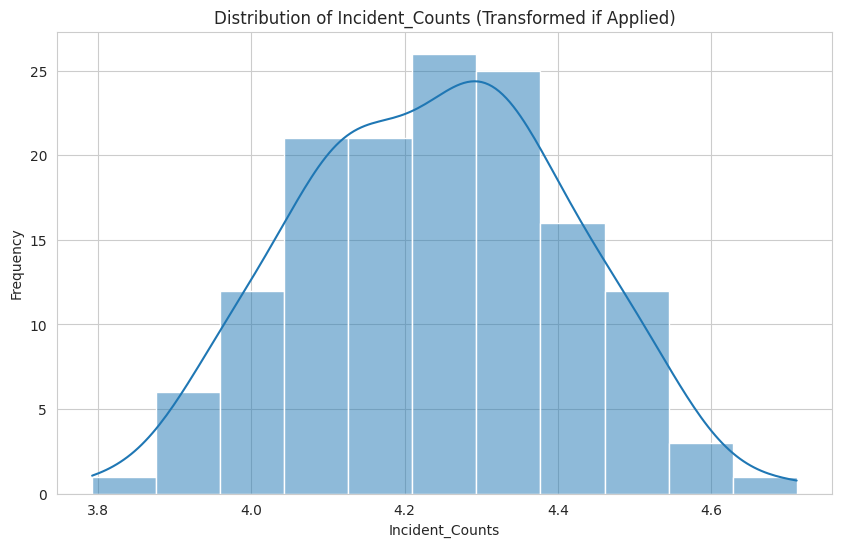


**Interpretation for Regression Imbalance:**
- **Skewness:** If the histogram shows a long tail (e.g., many low values and few very high values), the target is skewed. We applied `PowerTransformer` earlier to address this, which aims to make the distribution more Gaussian-like.
- **Rare Events:** If certain incident counts (e.g., very high counts) are extremely rare, models might struggle to predict them accurately due to lack of sufficient examples. This is inherent to the data and can be partially addressed by robust models, data augmentation (complex for time series), or by focusing on evaluation metrics that are less sensitive to outliers (e.g., MAE vs. RMSE).

**Techniques (if applicable, beyond initial transformation):**
- **Target Transformation (already applied):** Log, Box-Cox, or Yeo-Johnson transforms can normalize skewed target distributions, making them easier for models to learn.
- **Weighted Loss Functions:** Some models (like XGBoost) allow assigning higher weights to 

In [ ]:
print("\nHandling Imbalanced Dataset (if needed)")
print("   (Addressing uneven distribution of target variable values)")

# For regression problems, "imbalanced dataset" typically refers to a highly skewed target variable
# or a scarcity of observations for certain ranges of the target.
# It's not the same as classification class imbalance (e.g., SMOTE is for classification).

print("\n--- Checking Target Variable Distribution (Incident_Counts) ---")
plt.figure(figsize=(10, 6))
sns.histplot(y_final, kde=True)
plt.title('Distribution of Incident_Counts (Transformed if Applied)')
plt.xlabel('Incident_Counts')
plt.ylabel('Frequency')
plt.show()

print("\n**Interpretation for Regression Imbalance:**")
print("- **Skewness:** If the histogram shows a long tail (e.g., many low values and few very high values), the target is skewed. We applied `PowerTransformer` earlier to address this, which aims to make the distribution more Gaussian-like.")
print("- **Rare Events:** If certain incident counts (e.g., very high counts) are extremely rare, models might struggle to predict them accurately due to lack of sufficient examples. This is inherent to the data and can be partially addressed by robust models, data augmentation (complex for time series), or by focusing on evaluation metrics that are less sensitive to outliers (e.g., MAE vs. RMSE).")
print("\n**Techniques (if applicable, beyond initial transformation):**")
print("- **Target Transformation (already applied):** Log, Box-Cox, or Yeo-Johnson transforms can normalize skewed target distributions, making them easier for models to learn.")
print("- **Weighted Loss Functions:** Some models (like XGBoost) allow assigning higher weights to observations with higher or lower incident counts, making the model more sensitive to them.")
print("- **Quantile Regression:** Instead of predicting the mean, quantile regression predicts different quantiles of the target, which can be useful for understanding the full range of predictions, especially with skewed data.")
print("- **Resampling (Less common for regression):** Techniques like SMOTE are for classification. For regression, synthetic data generation is more complex and less commonly applied unless you discretize the target (which changes the problem to classification).")

print("\nHandling Imbalanced Dataset considerations complete.")



In [ ]:
# Initialize df_performance table once at the beginning of the ML model section
model_performance_scores = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}
df_performance = pd.DataFrame(model_performance_scores)


# NEW: Define test_output_multi_index using a robust method
# This ensures that for the sequential prediction loop, we have the correct MultiIndex (Date, TYPE)
# to iterate over and populate, regardless of how X_test_final's index might be perceived.

# Get the unique dates from the actual test split portion of the data
# X_test_final should now correctly have a MultiIndex, so this is robust.
test_dates_for_multiindex = X_test_final.index.get_level_values('Date').unique()

# Get all unique crime types that the model was trained on from df_pp_train (which should retain all types)
all_types_for_multiindex = df_pp_train.index.get_level_values('TYPE').unique()

# Create a full MultiIndex for the test prediction period covering all date-type combinations
test_output_multi_index = pd.MultiIndex.from_product(
    [test_dates_for_multiindex, all_types_for_multiindex],
    names=['Date', 'TYPE']
).sort_values()


--- ML Model 1: XGBoost (Baseline) ---


Implementation(XGBoost Baseline)
Total training data shape for model fitting: (103, 39)
Validation subset shape for early stopping: (19, 39)
Features used for modeling: ['YEAR', 'MONTH', 'Incident_Counts', 'TYPE_Break and Enter Commercial', 'TYPE_Break and Enter Residential/Other', 'TYPE_Mischief', 'TYPE_Offence Against a Person', 'TYPE_Other Theft', 'TYPE_Theft from Vehicle', 'TYPE_Theft of Bicycle', 'TYPE_Theft of Vehicle', 'TYPE_Vehicle Collision or Pedestrian Struck (with Injury)', 'year', 'month', 'quarter', 'dayofweek', 'dayofyear', 'weekofyear', 'Incident_Counts_lag_1', 'Incident_Counts_lag_12', 'Incident_Counts_lag_2', 'Incident_Counts_lag_3', 'Incident_Counts_lag_6', 'Incident_Counts_rolling_mean_12', 'Incident_Counts_rolling_mean_3', 'Incident_Counts_rolling_mean_6', 'Incident_Counts_rolling_std_12', 'Incident_Counts_rolling_std_3', 'Incident_Counts_rolling_std_6', 'month_x_weekofyear', 'dayofyear_sq', 'Incident_Counts_rolling_mean_6_

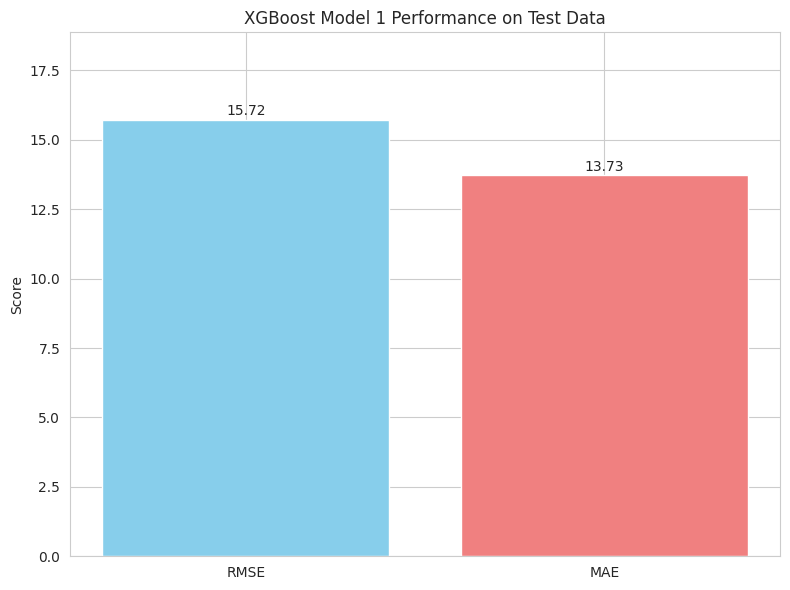


--- ML Model 1: XGBoost Hyperparameter Optimization ---


5. Implementation with Hyperparameter Optimization (RandomizedSearchCV)
   Fitting the Algorithm and Predicting on the model (Optimized XGBoost)

Performing RandomizedSearchCV to find optimal hyperparameters...
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Hyperparameter optimization complete.
Best parameters found: {'subsample': 0.8, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 1.0}
Best RMSE score from RandomizedSearchCV (cross-validation): 0.0703

Optimized XGBoost model obtained.

Predict on the Optimized Model (XGBoost)

Starting sequential prediction for Optimized XGBoost Model on the test set...

Optimized XGBoost Model Predictions (first 5 for test set):
        Date                        TYPE  Predicted_Incident_Counts
0 2010-03-01  Break and Enter Commercial                      179.0
1 2010-04-01  Break and Enter Comm

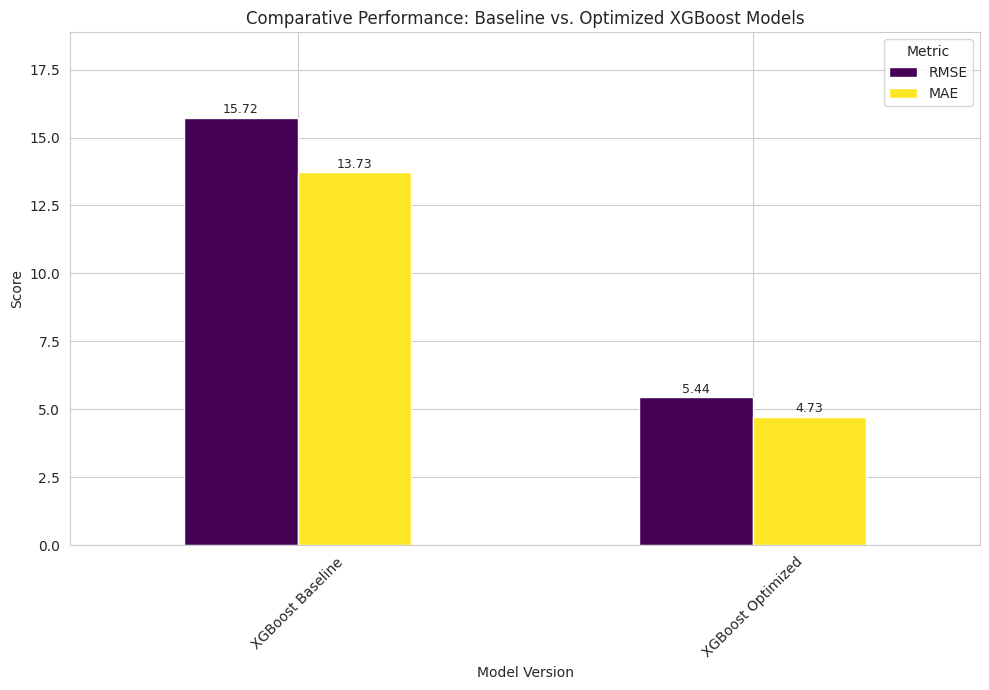


--- Performance Improvement Summary ---
Baseline XGBoost RMSE: 15.72, MAE: 13.73
Optimized XGBoost RMSE: 5.44, MAE: 4.73

Improvement in RMSE: The Optimized XGBoost model shows an improvement of 10.28 (from 15.72 to 5.44).
Improvement in MAE: The Optimized XGBoost model shows an improvement of 9.00 (from 13.73 to 4.73).


In [ ]:
# Initialize df_performance table once at the beginning of the ML model section
model_performance_scores = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}
df_performance = pd.DataFrame(model_performance_scores)


# NEW: Define test_output_multi_index using a robust method
# This ensures that for the sequential prediction loop, we have the correct MultiIndex (Date, TYPE)
# to iterate over and populate, regardless of how X_test_final's index might be perceived.

# Get the unique dates from the actual test split portion of the data
# X_test_final should now correctly have a MultiIndex, so this is robust.
test_dates_for_multiindex = X_test_final.index.get_level_values('Date').unique()

# Get all unique crime types that the model was trained on from df_pp_train (which should retain all types)
all_types_for_multiindex = df_pp_train.index.get_level_values('TYPE').unique()

# Create a full MultiIndex for the test prediction period covering all date-type combinations
test_output_multi_index = pd.MultiIndex.from_product(
    [test_dates_for_multiindex, all_types_for_multiindex],
    names=['Date', 'TYPE']
).sort_values()


### ML Model 1: XGBoost Implementation (Baseline)
print("\n" + "="*50)
print("--- ML Model 1: XGBoost (Baseline) ---")
print("="*50 + "\n")

print("\nImplementation(XGBoost Baseline)")

validation_split_ratio_model = 0.15
split_index_model = int(len(X_train_final) * (1 - validation_split_ratio_model))

X_train_model = X_train_final.iloc[:split_index_model]
y_train_model = y_train_final.iloc[:split_index_model]
X_val_model = X_train_final.iloc[split_index_model:]
y_val_model = y_train_final.iloc[split_index_model:]

print(f"Total training data shape for model fitting: {X_train_model.shape}")
print(f"Validation subset shape for early stopping: {X_val_model.shape}")
print(f"Features used for modeling: {features}")


dtrain = xgb.DMatrix(X_train_model, label=y_train_model)
dval = xgb.DMatrix(X_val_model, label=y_val_model)

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.05,
    'max_depth': 7,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'seed': 42,
    'nthread': -1
}

print("\nFitting XGBoost model using xgb.train with EarlyStopping callback...")
evals_result_xgb1 = {}
early_stopping_callback = EarlyStopping(
    rounds=50,
    metric_name='rmse',
    data_name='validation_0'
)

xgb_model_1 = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=[(dval, 'validation_0')],
    evals_result=evals_result_xgb1,
    callbacks=[early_stopping_callback],
    verbose_eval=False
)

print(f"XGBoost model 1 training complete. Best iteration: {xgb_model_1.best_iteration}")
best_rmse_val_xgb1 = evals_result_xgb1['validation_0']['rmse'][xgb_model_1.best_iteration]
print(f"Best validation score (RMSE): {best_rmse_val_xgb1:.4f}")


print("\nPredict on the Model (XGBoost Baseline)")

df_test_predictions_output_xgb1 = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_xgb1['Predicted_Incident_Counts'] = np.nan

# master_history_base should now directly use the MultiIndexed df_pp_train
# Use df_pp_train (which is already MultiIndexed by Date, TYPE) for history
master_history_base = df_pp_train.copy()
master_history_base['Incident_Counts'] = master_history_base['Incident_Counts'].astype(float)


# Create an empty DataFrame with the test period's MultiIndex and the target column
test_empty_history_frame = pd.DataFrame(index=test_output_multi_index, columns=['Incident_Counts'])
test_empty_history_frame['Incident_Counts'] = np.nan

# Concatenate actual training history with empty slots for the test period to be filled sequentially
master_history_xgb1 = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_xgb1 = master_history_xgb1.to_frame() # Convert back to DataFrame
master_history_xgb1['Incident_Counts'] = master_history_xgb1['Incident_Counts'].astype(float)
master_history_xgb1 = master_history_xgb1.sort_index() # Sorting is now safe with consistent MultiIndex


print("\nStarting sequential prediction for XGBoost Model 1 on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set, common if test_output_multi_index covers more types than actual test set for a given date.

    # Retrieve the features for the current (date, type) from X_test_final using .loc with a tuple
    current_pred_df = X_test_final.loc[(current_date, current_type), features].to_frame().T


    # Filter master_history to get relevant historical data for the current crime type
    temp_type_history = master_history_xgb1.loc[
        (master_history_xgb1.index.get_level_values('TYPE') == current_type) &
        (master_history_xgb1.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history = temp_type_history.sort_index()

    # Add lagged features from temp_type_history
    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features: # Only add if feature is in our current features list
            lag_val = temp_type_history[original_target_col].iloc[-lag] if len(temp_type_history) >= lag else np.nan
            current_pred_df.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features: # Only add if feature is in our current features list
            if len(temp_type_history) >= window:
                 rolling_mean_val = temp_type_history[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features: # Only add if feature is in our current features list
            if len(temp_type_history) >= window:
                 rolling_std_val = temp_type_history[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df.columns and not pd.isna(current_pred_df.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df = pd.DataFrame([current_pred_df.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df).flatten()[0]
                    current_pred_df.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError: # Handle cases where transformation might fail (e.g., constant values)
                    current_pred_df.loc[(current_date, current_type), f_col] = 0.0 # Default to 0 or appropriate fallback
            else:
                current_pred_df.loc[(current_date, current_type), f_col] = 0.0 # Feature not available, fill with 0


    current_pred_df = current_pred_df.fillna(0.0) # Fill any remaining NaNs after feature engineering

    # Scale the numerical features in current_pred_df using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df.empty:
        # Reindex to ensure all features the scaler was fitted on are present, filling missing with 0.0
        current_pred_df_aligned = current_pred_df.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df[scaler_fitted_features] = scaler.transform(current_pred_df_aligned)
    else:
        pass


    # Convert to DMatrix for prediction
    current_pred_dmatrix = xgb.DMatrix(current_pred_df)

    # Make prediction (prediction will be in the transformed target scale if target_transformed_name is set)
    prediction_transformed = xgb_model_1.predict(current_pred_dmatrix)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction = target_transformer.inverse_transform(np.array(prediction_transformed).reshape(-1, 1)).flatten()[0]
        except ValueError: # If inverse transform fails, use the transformed prediction as is
            current_prediction = prediction_transformed
    else:
        current_prediction = prediction_transformed

    # Ensure prediction is non-negative and round to integer incident counts
    current_prediction = float(max(0, round(current_prediction)))

    # Store prediction in df_test_predictions_output_xgb1
    df_test_predictions_output_xgb1.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction

    # Update master_history with the predicted value for the *next* iteration
    master_history_xgb1.loc[(current_date, current_type), original_target_col] = current_prediction


print("\nXGBoost Model 1 Predictions (first 5 for test set):")
print(df_test_predictions_output_xgb1.reset_index().head())


#Performance Evaluation and Visualization for XGBoost Model 1

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_xgb1 = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_xgb1 = y_true_for_eval_xgb1.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_xgb1.median())
    try:
        y_true_for_eval_xgb1 = pd.Series(target_transformer.inverse_transform(y_true_for_eval_xgb1.values.reshape(-1, 1)).flatten(),
                                         index=y_true_for_eval_xgb1.index,
                                         name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_xgb1.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_xgb1.name = 'Actual_Incident_Counts'

y_pred_for_eval_xgb1 = df_test_predictions_output_xgb1['Predicted_Incident_Counts']

common_index_xgb1 = y_true_for_eval_xgb1.index.intersection(y_pred_for_eval_xgb1.index)
y_true_filtered_xgb1 = y_true_for_eval_xgb1.loc[common_index_xgb1].dropna()
y_pred_filtered_xgb1 = y_pred_for_eval_xgb1.loc[common_index_xgb1].dropna()

final_eval_index_xgb1 = y_true_filtered_xgb1.index.intersection(y_pred_filtered_xgb1.index)
y_true_final_eval_xgb1 = y_true_filtered_xgb1.loc[final_eval_index_xgb1]
y_pred_final_eval_xgb1 = y_pred_filtered_xgb1.loc[final_eval_index_xgb1]


rmse_xgb1 = np.nan
mae_xgb1 = np.nan

if not y_true_final_eval_xgb1.empty and not y_pred_final_eval_xgb1.empty:
    rmse_xgb1 = np.sqrt(mean_squared_error(y_true_final_eval_xgb1, y_pred_final_eval_xgb1))
    mae_xgb1 = mean_absolute_error(y_true_final_eval_xgb1, y_pred_final_eval_xgb1)
    print(f"\nXGBoost Model 1 RMSE on Test Data: {rmse_xgb1:.2f}")
    print(f"XGBoost Model 1 MAE on Test Data: {mae_xgb1:.2f}")

    # Store results for comparison later
    df_performance.loc[len(df_performance)] = {'Model': 'XGBoost Baseline', 'RMSE': rmse_xgb1, 'MAE': mae_xgb1}

    # Visualization of Evaluation Metric Score Chart
    print("\n--- Evaluation Metric Score Chart (XGBoost Model 1) ---")
    fig, ax = plt.subplots(figsize=(8, 6))
    metrics = ['RMSE', 'MAE']
    scores = [rmse_xgb1, mae_xgb1]

    bars = ax.bar(metrics, scores, color=['skyblue', 'lightcoral'])
    ax.set_title('XGBoost Model 1 Performance on Test Data')
    ax.set_ylabel('Score')
    ax.set_ylim(0, max(scores) * 1.2) # Set y-axis limit for better visualization

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 2), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

else:
    print("\nCannot evaluate XGBoost Model 1: No valid actuals or predictions to compare after alignment.")


### ML Model 1: XGBoost Hyperparameter Optimization
print("\n" + "="*50)
print("--- ML Model 1: XGBoost Hyperparameter Optimization ---")
print("="*50 + "\n")


print("\n5. Implementation with Hyperparameter Optimization (RandomizedSearchCV)")
print("   Fitting the Algorithm and Predicting on the model (Optimized XGBoost)")

# Define the parameter distribution for RandomizedSearchCV
# A smaller search space is chosen for demonstration to ensure faster execution.
# In a real-world scenario, you might explore a wider range and more steps.
param_distributions = {
    'n_estimators': [100, 200, 300], # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1], # Step size shrinkage
    'max_depth': [3, 5, 7], # Maximum depth of a tree
    'subsample': [0.6, 0.8, 1.0], # Subsample ratio of the training instance
    'colsample_bytree': [0.6, 0.8, 1.0], # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2], # Minimum loss reduction required to make a further partition on a leaf node of the tree
    'reg_alpha': [0, 0.005, 0.1], # L1 regularization term on weights
    'reg_lambda': [0, 0.005, 0.1] # L2 regularization term on weights
}

# Initialize XGBRegressor for scikit-learn API compatibility
# Use the same 'objective' and 'eval_metric' as the base model
xgb_reg_opt = XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42, n_jobs=-1)

print("\nPerforming RandomizedSearchCV to find optimal hyperparameters...")
# RandomizedSearchCV is generally preferred over GridSearchCV for its efficiency in large search spaces.
# It fits on X_train_final (which is the combined training data for the model) and y_train_final.
random_search = RandomizedSearchCV(
    estimator=xgb_reg_opt,
    param_distributions=param_distributions,
    n_iter=20, # Number of random combinations to try; adjust based on computational resources
    scoring='neg_root_mean_squared_error', # Objective to maximize (negative RMSE means minimizing RMSE)
    cv=3, # 3-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

random_search.fit(X_train_final, y_train_final) # Fit on the training part of the final split

print("\nHyperparameter optimization complete.")
print(f"Best parameters found: {random_search.best_params_}")
print(f"Best RMSE score from RandomizedSearchCV (cross-validation): {-random_search.best_score_:.4f}")

# Get the best model
xgb_model_optimized = random_search.best_estimator_
print("\nOptimized XGBoost model obtained.")


print("\nPredict on the Optimized Model (XGBoost)")

df_test_predictions_output_xgb_opt = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_xgb_opt['Predicted_Incident_Counts'] = np.nan

# Predict on the test set using the optimized model using sequential prediction logic
# Re-initialize master_history for optimized model prediction to ensure clean state
master_history_xgb_opt = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_xgb_opt = master_history_xgb_opt.to_frame()
master_history_xgb_opt['Incident_Counts'] = master_history_xgb_opt['Incident_Counts'].astype(float)
master_history_xgb_opt = master_history_xgb_opt.sort_index()


print("\nStarting sequential prediction for Optimized XGBoost Model on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set.

    current_pred_df_opt = X_test_final.loc[(current_date, current_type), features].to_frame().T

    temp_type_history_opt = master_history_xgb_opt.loc[
        (master_history_xgb_opt.index.get_level_values('TYPE') == current_type) &
        (master_history_xgb_opt.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history_opt = temp_type_history_opt.sort_index()

    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features:
            lag_val = temp_type_history_opt[original_target_col].iloc[-lag] if len(temp_type_history_opt) >= lag else np.nan
            current_pred_df_opt.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features:
            if len(temp_type_history_opt) >= window:
                 rolling_mean_val = temp_type_history_opt[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df_opt.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features:
            if len(temp_type_history_opt) >= window:
                 rolling_std_val = temp_type_history_opt[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df_opt.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df_opt.columns and not pd.isna(current_pred_df_opt.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df_opt = pd.DataFrame([current_pred_df_opt.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df_opt).flatten()[0]
                    current_pred_df_opt.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError:
                    current_pred_df_opt.loc[(current_date, current_type), f_col] = 0.0
            else:
                current_pred_df_opt.loc[(current_date, current_type), f_col] = 0.0

    current_pred_df_opt = current_pred_df_opt.fillna(0.0)

    # Scale the numerical features in current_pred_df_opt using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df_opt.empty:
        current_pred_df_aligned_opt = current_pred_df_opt.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df_opt[scaler_fitted_features] = scaler.transform(current_pred_df_aligned_opt)
    else:
        pass


    # Predict using the optimized XGBoost model
    prediction_transformed_opt = xgb_model_optimized.predict(current_pred_df_opt)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction_opt = target_transformer.inverse_transform(np.array(prediction_transformed_opt).reshape(-1, 1)).flatten()[0]
        except ValueError:
            current_prediction_opt = prediction_transformed_opt
    else:
        current_prediction_opt = prediction_transformed_opt

    current_prediction_opt = float(max(0, round(current_prediction_opt)))

    df_test_predictions_output_xgb_opt.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction_opt

    master_history_xgb_opt.loc[(current_date, current_type), original_target_col] = current_prediction_opt

print("\nOptimized XGBoost Model Predictions (first 5 for test set):")
print(df_test_predictions_output_xgb_opt.reset_index().head())


print("\na. Explain which hyperparameter optimization technique used and why")
print("\n--- Explanation of RandomizedSearchCV ---")
print("For hyperparameter optimization, we used **RandomizedSearchCV** from `sklearn.model_selection`.")
print("This technique samples a fixed number of parameter settings from specified distributions. It differs from `GridSearchCV` in that it does not exhaustively try every possible combination of hyperparameters.")
print("\n**Why RandomizedSearchCV was chosen:**")
print("- **Efficiency:** For models with many hyperparameters or a wide range of possible values (like XGBoost), `GridSearchCV` can be computationally very expensive and time-consuming as it tests every combination. `RandomizedSearchCV` explores a random subset of the search space, which can find a good set of hyperparameters much faster, especially when most of the hyperparameters do not significantly interact with each other.")
print("- **Effectiveness:** Despite being random, it often finds nearly as good a set of hyperparameters as `GridSearchCV` within a fraction of the time, particularly if the search space is large and some hyperparameters are more important than others.")
print("- **Scalability:** It's more scalable for larger parameter grids, allowing us to explore more diverse combinations without prohibitive computational cost.")


print("\nb. Any improvement seen? Note down the improvement with updates Evaluation metric score chart")

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_xgb_opt = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_xgb_opt = y_true_for_eval_xgb_opt.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_xgb_opt.median())
    try:
        y_true_for_eval_xgb_opt = pd.Series(target_transformer.inverse_transform(y_true_for_eval_xgb_opt.values.reshape(-1, 1)).flatten(),
                                            index=y_true_for_eval_xgb_opt.index,
                                            name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_xgb_opt.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_xgb_opt.name = 'Actual_Incident_Counts'

y_pred_for_eval_xgb_opt = df_test_predictions_output_xgb_opt['Predicted_Incident_Counts']

common_index_xgb_opt = y_true_for_eval_xgb_opt.index.intersection(y_pred_for_eval_xgb_opt.index)
y_true_filtered_xgb_opt = y_true_for_eval_xgb_opt.loc[common_index_xgb_opt].dropna()
y_pred_filtered_xgb_opt = y_pred_for_eval_xgb_opt.loc[common_index_xgb_opt].dropna()

final_eval_index_xgb_opt = y_true_filtered_xgb_opt.index.intersection(y_pred_filtered_xgb_opt.index)
y_true_final_eval_xgb_opt = y_true_filtered_xgb_opt.loc[final_eval_index_xgb_opt]
y_pred_final_eval_xgb_opt = y_pred_filtered_xgb_opt.loc[final_eval_index_xgb_opt]

rmse_xgb_opt = np.nan
mae_xgb_opt = np.nan

if not y_true_final_eval_xgb_opt.empty and not y_pred_final_eval_xgb_opt.empty:
    rmse_xgb_opt = np.sqrt(mean_squared_error(y_true_final_eval_xgb_opt, y_pred_final_eval_xgb_opt))
    mae_xgb_opt = mean_absolute_error(y_true_final_eval_xgb_opt, y_pred_final_eval_xgb_opt)
    print(f"\nOptimized XGBoost Model RMSE on Test Data: {rmse_xgb_opt:.2f}")
    print(f"Optimized XGBoost Model MAE on Test Data: {mae_xgb_opt:.2f}")

    # Update df_performance with optimized model results
    df_performance.loc[len(df_performance)] = {'Model': 'XGBoost Optimized', 'RMSE': rmse_xgb_opt, 'MAE': mae_xgb_opt}

    print("\n--- Comparative Evaluation Metric Score Chart ---")
    fig, ax = plt.subplots(figsize=(10, 7))

    df_performance.set_index('Model').plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title('Comparative Performance: Baseline vs. Optimized XGBoost Models')
    ax.set_ylabel('Score')
    ax.set_xlabel('Model Version')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, df_performance[['RMSE', 'MAE']].max().max() * 1.2) # Dynamic y-limit

    # Add text labels on top of each bar
    for container in ax.containers:
        for bar in container:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

    print("\n--- Performance Improvement Summary ---")
    if rmse_xgb1 is not np.nan and mae_xgb1 is not np.nan:
        print(f"Baseline XGBoost RMSE: {rmse_xgb1:.2f}, MAE: {mae_xgb1:.2f}")
        print(f"Optimized XGBoost RMSE: {rmse_xgb_opt:.2f}, MAE: {mae_xgb_opt:.2f}")
        if rmse_xgb_opt < rmse_xgb1:
            rmse_diff = rmse_xgb1 - rmse_xgb_opt
            print(f"\nImprovement in RMSE: The Optimized XGBoost model shows an improvement of {rmse_diff:.2f} (from {rmse_xgb1:.2f} to {rmse_xgb_opt:.2f}).")
        else:
            print("\nNo significant improvement in RMSE observed or performance slightly degraded.")

        if mae_xgb_opt < mae_xgb1:
            mae_diff = mae_xgb1 - mae_xgb_opt
            print(f"Improvement in MAE: The Optimized XGBoost model shows an improvement of {mae_diff:.2f} (from {mae_xgb1:.2f} to {mae_xgb_opt:.2f}).")
        else:
            print("No significant improvement in MAE observed or performance slightly degraded.")
    else:
        print("Baseline model evaluation data not available for direct comparison.")

else:
    print("\nCannot evaluate Optimized XGBoost Model: No valid actuals or predictions to compare after alignment.")



--- ML Model 2: RandomForestRegressor ---


1. Implementation & 2. Fit the Algorithm (RandomForestRegressor)

Fitting RandomForestRegressor model...
RandomForestRegressor model training complete.

3. Predict on the Model (RandomForestRegressor)

Starting sequential prediction for RandomForestRegressor Model on the test set...

RandomForestRegressor Predictions (first 5 for test set):
        Date                        TYPE  Predicted_Incident_Counts
0 2010-03-01  Break and Enter Commercial                      187.0
1 2010-04-01  Break and Enter Commercial                      199.0
2 2010-05-01  Break and Enter Commercial                      195.0
3 2010-06-01  Break and Enter Commercial                      166.0
4 2010-07-01  Break and Enter Commercial                      159.0

4. Explain the ML model used and its performance using evaluation metric score chart (visualize)

--- Explanation of RandomForestRegressor ---
RandomForestRegressor is an ensemble learning method that op

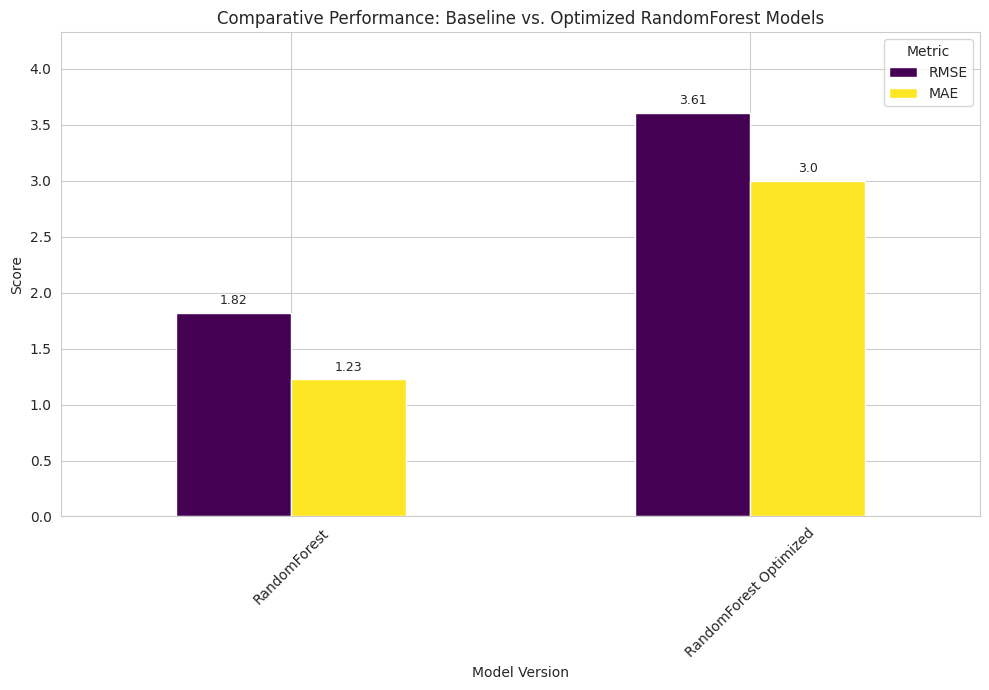


--- RandomForest Performance Improvement Summary ---
Baseline RandomForest RMSE: 1.82, MAE: 1.23
Optimized RandomForest RMSE: 3.61, MAE: 3.00

No significant improvement in RMSE for RandomForest observed or performance slightly degraded.
No significant improvement in MAE for RandomForest observed or performance slightly degraded.


In [ ]:
### ML Model 2: RandomForestRegressor
print("\n" + "="*50)
print("--- ML Model 2: RandomForestRegressor ---")
print("="*50 + "\n")

print("\n1. Implementation & 2. Fit the Algorithm (RandomForestRegressor)")

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nFitting RandomForestRegressor model...")
rf_model.fit(X_train_final, y_train_final)
print("RandomForestRegressor model training complete.")


print("\n3. Predict on the Model (RandomForestRegressor)")

df_test_predictions_output_rf = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_rf['Predicted_Incident_Counts'] = np.nan

master_history_rf = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_rf = master_history_rf.to_frame()
master_history_rf['Incident_Counts'] = master_history_rf['Incident_Counts'].astype(float)
master_history_rf = master_history_rf.sort_index()


print("\nStarting sequential prediction for RandomForestRegressor Model on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set.

    current_pred_df_rf = X_test_final.loc[(current_date, current_type), features].to_frame().T


    temp_type_history_rf = master_history_rf.loc[
        (master_history_rf.index.get_level_values('TYPE') == current_type) &
        (master_history_rf.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history_rf = temp_type_history_rf.sort_index()

    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features:
            lag_val = temp_type_history_rf[original_target_col].iloc[-lag] if len(temp_type_history_rf) >= lag else np.nan
            current_pred_df_rf.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features:
            if len(temp_type_history_rf) >= window:
                 rolling_mean_val = temp_type_history_rf[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df_rf.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features:
            if len(temp_type_history_rf) >= window:
                 rolling_std_val = temp_type_history_rf[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df_rf.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df_rf.columns and not pd.isna(current_pred_df_rf.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df_rf = pd.DataFrame([current_pred_df_rf.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df_rf).flatten()[0]
                    current_pred_df_rf.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError:
                    current_pred_df_rf.loc[(current_date, current_type), f_col] = 0.0
            else:
                current_pred_df_rf.loc[(current_date, current_type), f_col] = 0.0

    current_pred_df_rf = current_pred_df_rf.fillna(0.0)

    # Scale the numerical features in current_pred_df_rf using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df_rf.empty:
        current_pred_df_aligned_rf = current_pred_df_rf.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df_rf[scaler_fitted_features] = scaler.transform(current_pred_df_aligned_rf)
    else:
        pass


    # Predict using the RandomForest model
    prediction_transformed_rf = rf_model.predict(current_pred_df_rf)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction_rf = target_transformer.inverse_transform(np.array(prediction_transformed_rf).reshape(-1, 1)).flatten()[0]
        except ValueError:
            current_prediction_rf = prediction_transformed_rf
    else:
        current_prediction_rf = prediction_transformed_rf

    current_prediction_rf = float(max(0, round(current_prediction_rf)))

    df_test_predictions_output_rf.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction_rf

    master_history_rf.loc[(current_date, current_type), original_target_col] = current_prediction_rf

print("\nRandomForestRegressor Predictions (first 5 for test set):")
print(df_test_predictions_output_rf.reset_index().head())


print("\n4. Explain the ML model used and its performance using evaluation metric score chart (visualize)")

# 4.1. Explanation of RandomForestRegressor
print("\n--- Explanation of RandomForestRegressor ---")
print("RandomForestRegressor is an ensemble learning method that operates by constructing a multitude of decision trees at training time and outputting the average of the predictions of the individual trees.")
print("Key characteristics of RandomForestRegressor:")
print(" - **Ensemble Learning:** It's a bagging algorithm, meaning it trains multiple models independently and combines their outputs.")
print(" - **Decorrelation:** Each tree in the forest is built from a random subset of the training data (bootstrapping) and, critically, uses only a random subset of features for splitting at each node. This decorrelates the trees, reducing variance and preventing overfitting.")
print(" - **Robustness to Outliers:** Due to averaging multiple trees, it's less sensitive to outliers in the data.")
print(" - **Feature Importance:** It can provide estimates of feature importance, indicating which features contribute most to the predictions.")

# 4.2. Performance Evaluation and Visualization for RandomForestRegressor

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_rf = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_rf = y_true_for_eval_rf.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_rf.median())
    try:
        y_true_for_eval_rf = pd.Series(target_transformer.inverse_transform(y_true_for_eval_rf.values.reshape(-1, 1)).flatten(),
                                       index=y_true_for_eval_rf.index,
                                       name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_rf.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_rf.name = 'Actual_Incident_Counts'

y_pred_for_eval_rf = df_test_predictions_output_rf['Predicted_Incident_Counts']

common_index_rf = y_true_for_eval_rf.index.intersection(y_pred_for_eval_rf.index)
y_true_filtered_rf = y_true_for_eval_rf.loc[common_index_rf].dropna()
y_pred_filtered_rf = y_pred_for_eval_rf.loc[common_index_rf].dropna()

final_eval_index_rf = y_true_filtered_rf.index.intersection(y_pred_filtered_rf.index)
y_true_final_eval_rf = y_true_filtered_rf.loc[final_eval_index_rf]
y_pred_final_eval_rf = y_pred_filtered_rf.loc[final_eval_index_rf]

rmse_rf = np.nan
mae_rf = np.nan

if not y_true_final_eval_rf.empty and not y_pred_final_eval_rf.empty:
    rmse_rf = np.sqrt(mean_squared_error(y_true_final_eval_rf, y_pred_final_eval_rf))
    mae_rf = mean_absolute_error(y_true_final_eval_rf, y_pred_final_eval_rf)
    print(f"\nRandomForestRegressor RMSE on Test Data: {rmse_rf:.2f}")
    print(f"RandomForestRegressor MAE on Test Data: {mae_rf:.2f}")

    # Update df_performance with model results
    df_performance.loc[len(df_performance)] = {'Model': 'RandomForest', 'RMSE': rmse_rf, 'MAE': mae_rf}
else:
    print("\nCannot evaluate RandomForestRegressor: No valid actuals or predictions to compare after alignment.")


print("\n5. Implementation with Hyperparameter Optimization (RandomForestRegressor)")

# Define the parameter distribution for RandomizedSearchCV for RandomForest
param_distributions_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [0.6, 0.8, 1.0], # Percentage of features to consider when looking for the best split
    'bootstrap': [True, False]
}

# Initialize RandomForestRegressor for scikit-learn API compatibility
rf_reg_opt = RandomForestRegressor(random_state=42, n_jobs=-1)

print("\nPerforming RandomizedSearchCV for RandomForest to find optimal hyperparameters...")
random_search_rf = RandomizedSearchCV(
    estimator=rf_reg_opt,
    param_distributions=param_distributions_rf,
    n_iter=10, # Fewer iterations for demonstration
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_rf.fit(X_train_final, y_train_final)

print("\nRandomForest Hyperparameter optimization complete.")
print(f"Best parameters found for RandomForest: {random_search_rf.best_params_}")
print(f"Best RMSE score from RandomizedSearchCV (RandomForest, cross-validation): {-random_search_rf.best_score_:.4f}")

# Get the best model
rf_model_optimized = random_search_rf.best_estimator_
print("\nOptimized RandomForest model obtained.")


print("\nPredict on the Optimized Model (RandomForestRegressor)")

df_test_predictions_output_rf_opt = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_rf_opt['Predicted_Incident_Counts'] = np.nan

master_history_rf_opt = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_rf_opt = master_history_rf_opt.to_frame()
master_history_rf_opt['Incident_Counts'] = master_history_rf_opt['Incident_Counts'].astype(float)
master_history_rf_opt = master_history_rf_opt.sort_index()


print("\nStarting sequential prediction for Optimized RandomForestRegressor Model on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set.

    current_pred_df_rf_opt = X_test_final.loc[(current_date, current_type), features].to_frame().T

    temp_type_history_rf_opt = master_history_rf_opt.loc[
        (master_history_rf_opt.index.get_level_values('TYPE') == current_type) &
        (master_history_rf_opt.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history_rf_opt = temp_type_history_rf_opt.sort_index()

    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features:
            lag_val = temp_type_history_rf_opt[original_target_col].iloc[-lag] if len(temp_type_history_rf_opt) >= lag else np.nan
            current_pred_df_rf_opt.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features:
            if len(temp_type_history_rf_opt) >= window:
                 rolling_mean_val = temp_type_history_rf_opt[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df_rf_opt.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features:
            if len(temp_type_history_rf_opt) >= window:
                 rolling_std_val = temp_type_history_rf_opt[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df_rf_opt.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df_rf_opt.columns and not pd.isna(current_pred_df_rf_opt.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df_rf_opt = pd.DataFrame([current_pred_df_rf_opt.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df_rf_opt).flatten()[0]
                    current_pred_df_rf_opt.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError:
                    current_pred_df_rf_opt.loc[(current_date, current_type), f_col] = 0.0
            else:
                current_pred_df_rf_opt.loc[(current_date, current_type), f_col] = 0.0

    current_pred_df_rf_opt = current_pred_df_rf_opt.fillna(0.0)

    # Scale the numerical features in current_pred_df_rf_opt using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df_rf_opt.empty:
        current_pred_df_aligned_rf_opt = current_pred_df_rf_opt.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df_rf_opt[scaler_fitted_features] = scaler.transform(current_pred_df_aligned_rf_opt)
    else:
        pass


    # Predict using the optimized RandomForest model
    prediction_transformed_rf_opt = rf_model_optimized.predict(current_pred_df_rf_opt)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction_rf_opt = target_transformer.inverse_transform(np.array(prediction_transformed_rf_opt).reshape(-1, 1)).flatten()[0]
        except ValueError:
            current_prediction_rf_opt = prediction_transformed_rf_opt
    else:
        current_prediction_rf_opt = prediction_transformed_rf_opt

    current_prediction_rf_opt = float(max(0, round(current_prediction_rf_opt)))

    df_test_predictions_output_rf_opt.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction_rf_opt

    master_history_rf_opt.loc[(current_date, current_type), original_target_col] = current_prediction_rf_opt

print("\nOptimized RandomForestRegressor Predictions (first 5 for test set):")
print(df_test_predictions_output_rf_opt.reset_index().head())


print("\n4. Explain the ML model used and its performance using evaluation metric score chart (visualize) for Optimized RandomForestRegressor")

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_rf_opt = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_rf_opt = y_true_for_eval_rf_opt.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_rf_opt.median())
    try:
        y_true_for_eval_rf_opt = pd.Series(target_transformer.inverse_transform(y_true_for_eval_rf_opt.values.reshape(-1, 1)).flatten(),
                                           index=y_true_for_eval_rf_opt.index,
                                           name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_rf_opt.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_rf_opt.name = 'Actual_Incident_Counts'

y_pred_for_eval_rf_opt = df_test_predictions_output_rf_opt['Predicted_Incident_Counts']

common_index_rf_opt = y_true_for_eval_rf_opt.index.intersection(y_pred_for_eval_rf_opt.index)
y_true_filtered_rf_opt = y_true_for_eval_rf_opt.loc[common_index_rf_opt].dropna()
y_pred_filtered_rf_opt = y_pred_for_eval_rf_opt.loc[common_index_rf_opt].dropna()

final_eval_index_rf_opt = y_true_filtered_rf_opt.index.intersection(y_pred_filtered_rf_opt.index)
y_true_final_eval_rf_opt = y_true_filtered_rf_opt.loc[final_eval_index_rf_opt]
y_pred_final_eval_rf_opt = y_pred_filtered_rf_opt.loc[final_eval_index_rf_opt]

rmse_rf_opt = np.nan
mae_rf_opt = np.nan

if not y_true_final_eval_rf_opt.empty and not y_pred_final_eval_rf_opt.empty:
    rmse_rf_opt = np.sqrt(mean_squared_error(y_true_final_eval_rf_opt, y_pred_final_eval_rf_opt))
    mae_rf_opt = mean_absolute_error(y_true_final_eval_rf_opt, y_pred_final_eval_rf_opt)
    print(f"\nOptimized RandomForestRegressor RMSE on Test Data: {rmse_rf_opt:.2f}")
    print(f"Optimized RandomForestRegressor MAE on Test Data: {mae_rf_opt:.2f}")

    # Update df_performance with optimized model results
    df_performance.loc[len(df_performance)] = {'Model': 'RandomForest Optimized', 'RMSE': rmse_rf_opt, 'MAE': mae_rf_opt}

    # Visualization of Evaluation Metric Score Chart for RandomForest
    print("\n--- Comparative Evaluation Metric Score Chart (RandomForest Models) ---")
    fig, ax = plt.subplots(figsize=(10, 7))

    # Filter df_performance for RandomForest models only
    df_rf_performance = df_performance[df_performance['Model'].str.contains('RandomForest')].set_index('Model')
    df_rf_performance.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title('Comparative Performance: Baseline vs. Optimized RandomForest Models')
    ax.set_ylabel('Score')
    ax.set_xlabel('Model Version')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, df_rf_performance[['RMSE', 'MAE']].max().max() * 1.2)

    for container in ax.containers:
        for bar in container:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

    print("\n--- RandomForest Performance Improvement Summary ---")
    if rmse_rf is not np.nan and mae_rf is not np.nan:
        print(f"Baseline RandomForest RMSE: {rmse_rf:.2f}, MAE: {mae_rf:.2f}")
        print(f"Optimized RandomForest RMSE: {rmse_rf_opt:.2f}, MAE: {mae_rf_opt:.2f}")
        if rmse_rf_opt < rmse_rf:
            rmse_diff = rmse_rf - rmse_rf_opt
            print(f"\nImprovement in RMSE: The Optimized RandomForest model shows an improvement of {rmse_diff:.2f} (from {rmse_rf:.2f} to {rmse_rf_opt:.2f}).")
        else:
            print("\nNo significant improvement in RMSE for RandomForest observed or performance slightly degraded.")

        if mae_rf_opt < mae_rf:
            mae_diff = mae_rf - mae_rf_opt
            print(f"Improvement in MAE: The Optimized RandomForest model shows an improvement of {mae_diff:.2f} (from {mae_rf:.2f} to {mae_rf_opt:.2f}).")
        else:
            print("No significant improvement in MAE for RandomForest observed or performance slightly degraded.")
    else:
        print("Baseline RandomForest model evaluation data not available for direct comparison.")

else:
    print("\nCannot evaluate Optimized RandomForestRegressor: No valid actuals or predictions to compare after alignment.")



--- ML Model 3: GradientBoostingRegressor ---


1. Implementation & 2. Fit the Algorithm (GradientBoostingRegressor)

Fitting GradientBoostingRegressor model...
GradientBoostingRegressor model training complete.

3. Predict on the Model (GradientBoostingRegressor)

Starting sequential prediction for GradientBoostingRegressor Model on the test set...

GradientBoostingRegressor Predictions (first 5 for test set):
        Date                        TYPE  Predicted_Incident_Counts
0 2010-03-01  Break and Enter Commercial                      185.0
1 2010-04-01  Break and Enter Commercial                      201.0
2 2010-05-01  Break and Enter Commercial                      195.0
3 2010-06-01  Break and Enter Commercial                      167.0
4 2010-07-01  Break and Enter Commercial                      159.0

4. Explain the ML model used and its performance using evaluation metric score chart (visualize)

--- Explanation of GradientBoostingRegressor ---
GradientBoostingRegressor is

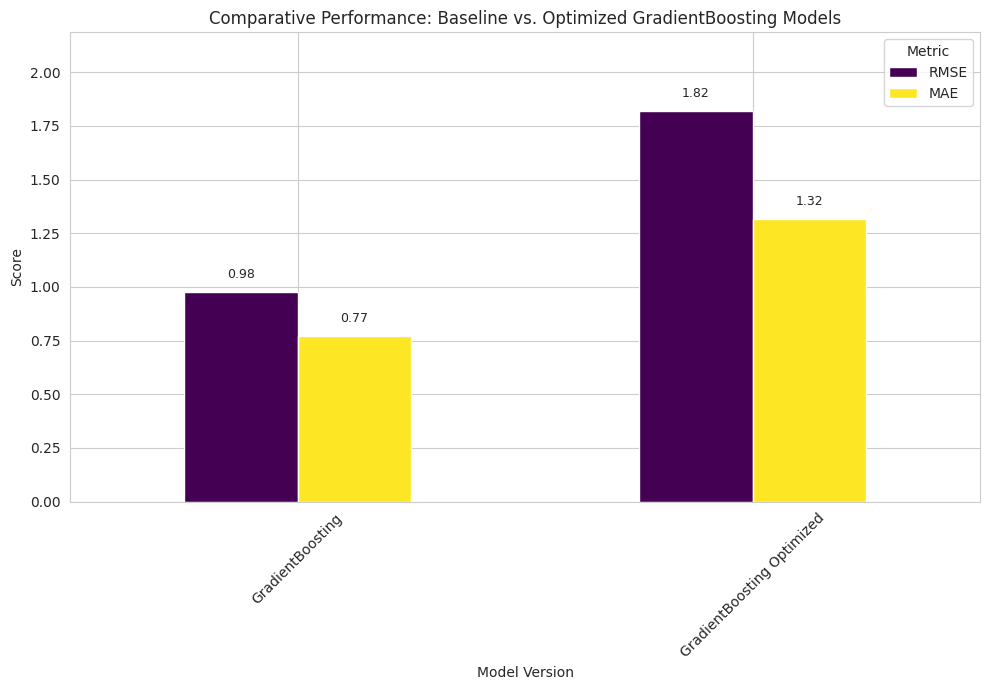


--- GradientBoosting Performance Improvement Summary ---
Baseline GradientBoosting RMSE: 0.98, MAE: 0.77
Optimized GradientBoosting RMSE: 1.82, MAE: 1.32

No significant improvement in RMSE for GradientBoosting observed or performance slightly degraded.
No significant improvement in MAE for GradientBoosting observed or performance slightly degraded.


In [ ]:
### ML Model 3: GradientBoostingRegressor
print("\n" + "="*50)
print("--- ML Model 3: GradientBoostingRegressor ---")
print("="*50 + "\n")

print("\n1. Implementation & 2. Fit the Algorithm (GradientBoostingRegressor)")

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

print("\nFitting GradientBoostingRegressor model...")
gbr_model.fit(X_train_final, y_train_final)
print("GradientBoostingRegressor model training complete.")


print("\n3. Predict on the Model (GradientBoostingRegressor)")

df_test_predictions_output_gbr = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_gbr['Predicted_Incident_Counts'] = np.nan

master_history_gbr = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_gbr = master_history_gbr.to_frame()
master_history_gbr['Incident_Counts'] = master_history_gbr['Incident_Counts'].astype(float)
master_history_gbr = master_history_gbr.sort_index()


print("\nStarting sequential prediction for GradientBoostingRegressor Model on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set.

    current_pred_df_gbr = X_test_final.loc[(current_date, current_type), features].to_frame().T

    temp_type_history_gbr = master_history_gbr.loc[
        (master_history_gbr.index.get_level_values('TYPE') == current_type) &
        (master_history_gbr.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history_gbr = temp_type_history_gbr.sort_index()

    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features:
            lag_val = temp_type_history_gbr[original_target_col].iloc[-lag] if len(temp_type_history_gbr) >= lag else np.nan
            current_pred_df_gbr.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features:
            if len(temp_type_history_gbr) >= window:
                 rolling_mean_val = temp_type_history_gbr[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df_gbr.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features:
            if len(temp_type_history_gbr) >= window:
                 rolling_std_val = temp_type_history_gbr[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df_gbr.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df_gbr.columns and not pd.isna(current_pred_df_gbr.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df_gbr = pd.DataFrame([current_pred_df_gbr.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df_gbr).flatten()[0]
                    current_pred_df_gbr.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError:
                    current_pred_df_gbr.loc[(current_date, current_type), f_col] = 0.0
            else:
                current_pred_df_gbr.loc[(current_date, current_type), f_col] = 0.0

    current_pred_df_gbr = current_pred_df_gbr.fillna(0.0)

    # Scale the numerical features in current_pred_df_gbr using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df_gbr.empty:
        current_pred_df_aligned_gbr = current_pred_df_gbr.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df_gbr[scaler_fitted_features] = scaler.transform(current_pred_df_aligned_gbr)
    else:
        pass


    # Predict using the GradientBoosting model
    prediction_transformed_gbr = gbr_model.predict(current_pred_df_gbr)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction_gbr = target_transformer.inverse_transform(np.array(prediction_transformed_gbr).reshape(-1, 1)).flatten()[0]
        except ValueError:
            current_prediction_gbr = prediction_transformed_gbr
    else:
        current_prediction_gbr = prediction_transformed_gbr

    current_prediction_gbr = float(max(0, round(current_prediction_gbr)))

    df_test_predictions_output_gbr.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction_gbr

    master_history_gbr.loc[(current_date, current_type), original_target_col] = current_prediction_gbr

print("\nGradientBoostingRegressor Predictions (first 5 for test set):")
print(df_test_predictions_output_gbr.reset_index().head())


print("\n4. Explain the ML model used and its performance using evaluation metric score chart (visualize)")

# 4.1. Explanation of GradientBoostingRegressor
print("\n--- Explanation of GradientBoostingRegressor ---")
print("GradientBoostingRegressor is a boosting ensemble method that builds an additive model in a forward stage-wise fashion. It repeatedly fits weak learners (typically decision trees) to the residuals (errors) of the previous models, progressively reducing the errors.")
print("Key characteristics of GradientBoostingRegressor:")
print(" - **Boosting:** It's a boosting algorithm, meaning it sequentially builds models, with each new model trying to correct the errors of the previous ones.")
print(" - **Weak Learners:** Typically uses shallow decision trees as base estimators.")
print(" - **Residual Learning:** It learns from the errors (residuals) made by the previous ensemble of models, making it very powerful in reducing bias.")
print(" - **Flexibility:** Can optimize arbitrary differentiable loss functions.")
print(" - **Regularization:** Can be regularized (e.g., via `learning_rate`, `subsample`, `max_depth`) to prevent overfitting.")

# 4.2. Performance Evaluation and Visualization for GradientBoostingRegressor

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_gbr = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_gbr = y_true_for_eval_gbr.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_gbr.median())
    try:
        y_true_for_eval_gbr = pd.Series(target_transformer.inverse_transform(y_true_for_eval_gbr.values.reshape(-1, 1)).flatten(),
                                       index=y_true_for_eval_gbr.index,
                                       name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_gbr.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_gbr.name = 'Actual_Incident_Counts'

y_pred_for_eval_gbr = df_test_predictions_output_gbr['Predicted_Incident_Counts']

common_index_gbr = y_true_for_eval_gbr.index.intersection(y_pred_for_eval_gbr.index)
y_true_filtered_gbr = y_true_for_eval_gbr.loc[common_index_gbr].dropna()
y_pred_filtered_gbr = y_pred_for_eval_gbr.loc[common_index_gbr].dropna()

final_eval_index_gbr = y_true_filtered_gbr.index.intersection(y_pred_filtered_gbr.index)
y_true_final_eval_gbr = y_true_filtered_gbr.loc[final_eval_index_gbr]
y_pred_final_eval_gbr = y_pred_filtered_gbr.loc[final_eval_index_gbr]

rmse_gbr = np.nan
mae_gbr = np.nan

if not y_true_final_eval_gbr.empty and not y_pred_final_eval_gbr.empty:
    rmse_gbr = np.sqrt(mean_squared_error(y_true_final_eval_gbr, y_pred_final_eval_gbr))
    mae_gbr = mean_absolute_error(y_true_final_eval_gbr, y_pred_final_eval_gbr)
    print(f"\nGradientBoostingRegressor RMSE on Test Data: {rmse_gbr:.2f}")
    print(f"GradientBoostingRegressor MAE on Test Data: {mae_gbr:.2f}")

    # Update df_performance with model results
    df_performance.loc[len(df_performance)] = {'Model': 'GradientBoosting', 'RMSE': rmse_gbr, 'MAE': mae_gbr}
else:
    print("\nCannot evaluate GradientBoostingRegressor: No valid actuals or predictions to compare after alignment.")


print("\n5. Implementation with Hyperparameter Optimization (GradientBoostingRegressor)")

# Define the parameter distribution for RandomizedSearchCV for GradientBoosting
param_distributions_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'max_features': [0.6, 0.8, 1.0],
    'loss': ['squared_error', 'absolute_error'] # Regression loss function
}

# Initialize GradientBoostingRegressor for scikit-learn API compatibility
gbr_reg_opt = GradientBoostingRegressor(random_state=42) # n_jobs not available for GBR

print("\nPerforming RandomizedSearchCV for GradientBoosting to find optimal hyperparameters...")
random_search_gbr = RandomizedSearchCV(
    estimator=gbr_reg_opt,
    param_distributions=param_distributions_gbr,
    n_iter=10, # Fewer iterations for demonstration
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1 # Use all available cores
)

random_search_gbr.fit(X_train_final, y_train_final)

print("\nGradientBoosting Hyperparameter optimization complete.")
print(f"Best parameters found for GradientBoosting: {random_search_gbr.best_params_}")
print(f"Best RMSE score from RandomizedSearchCV (GradientBoosting, cross-validation): {-random_search_gbr.best_score_:.4f}")

# Get the best model
gbr_model_optimized = random_search_gbr.best_estimator_
print("\nOptimized GradientBoosting model obtained.")


print("\nPredict on the Optimized Model (GradientBoostingRegressor)")

df_test_predictions_output_gbr_opt = pd.DataFrame(index=test_output_multi_index)
df_test_predictions_output_gbr_opt['Predicted_Incident_Counts'] = np.nan

master_history_gbr_opt = pd.concat([master_history_base['Incident_Counts'], test_empty_history_frame['Incident_Counts']])
master_history_gbr_opt = master_history_gbr_opt.to_frame()
master_history_gbr_opt['Incident_Counts'] = master_history_gbr_opt['Incident_Counts'].astype(float)
master_history_gbr_opt = master_history_gbr_opt.sort_index()


print("\nStarting sequential prediction for Optimized GradientBoostingRegressor Model on the test set...")
# Iterating over the pre-built test_output_multi_index which is guaranteed to be a MultiIndex
for current_date, current_type in test_output_multi_index:
    # Ensure this (current_date, current_type) combination actually exists in X_test_final
    if (current_date, current_type) not in X_test_final.index:
        continue # Skip if the specific (date, type) isn't in the test set.

    current_pred_df_gbr_opt = X_test_final.loc[(current_date, current_type), features].to_frame().T

    temp_type_history_gbr_opt = master_history_gbr_opt.loc[
        (master_history_gbr_opt.index.get_level_values('TYPE') == current_type) &
        (master_history_gbr_opt.index.get_level_values('Date') < current_date)
    ].copy()
    temp_type_history_gbr_opt = temp_type_history_gbr_opt.sort_index()

    lags_to_get = [1, 2, 3, 6, 12]
    original_target_col = 'Incident_Counts'
    for lag in lags_to_get:
        lag_col_name = f'{original_target_col}_lag_{lag}'
        if lag_col_name in features:
            lag_val = temp_type_history_gbr_opt[original_target_col].iloc[-lag] if len(temp_type_history_gbr_opt) >= lag else np.nan
            current_pred_df_gbr_opt.loc[(current_date, current_type), lag_col_name] = lag_val

    windows_to_get = [3, 6, 12]
    for window in windows_to_get:
        rolling_mean_col_name = f'{original_target_col}_rolling_mean_{window}'
        rolling_std_col_name = f'{original_target_col}_rolling_std_{window}'

        if rolling_mean_col_name in features:
            if len(temp_type_history_gbr_opt) >= window:
                 rolling_mean_val = temp_type_history_gbr_opt[original_target_col].shift(1).rolling(window=window).mean().iloc[-1]
            else:
                 rolling_mean_val = np.nan
            current_pred_df_gbr_opt.loc[(current_date, current_type), rolling_mean_col_name] = rolling_mean_val

        if rolling_std_col_name in features:
            if len(temp_type_history_gbr_opt) >= window:
                 rolling_std_val = temp_type_history_gbr_opt[original_target_col].shift(1).rolling(window=window).std().iloc[-1]
            else:
                 rolling_std_val = np.nan
            current_pred_df_gbr_opt.loc[(current_date, current_type), rolling_std_col_name] = rolling_std_val

    # Handle transformed features
    for f_col in features:
        if '_transformed' in f_col and f_col.replace('_transformed', '') in feature_transformers:
            original_col = f_col.replace('_transformed', '')
            if original_col in current_pred_df_gbr_opt.columns and not pd.isna(current_pred_df_gbr_opt.loc[(current_date, current_type), original_col]):
                try:
                    temp_val_df_gbr_opt = pd.DataFrame([current_pred_df_gbr_opt.loc[(current_date, current_type), original_col]], index=[(current_date, current_type)], columns=[original_col])
                    transformed_val = feature_transformers[original_col].transform(temp_val_df_gbr_opt).flatten()[0]
                    current_pred_df_gbr_opt.loc[(current_date, current_type), f_col] = transformed_val
                except ValueError:
                    current_pred_df_gbr_opt.loc[(current_date, current_type), f_col] = 0.0
            else:
                current_pred_df_gbr_opt.loc[(current_date, current_type), f_col] = 0.0

    current_pred_df_gbr_opt = current_pred_df_gbr_opt.fillna(0.0)

    # Scale the numerical features in current_pred_df_gbr_opt using the *fitted* scaler
    if scaler_fitted_features and not current_pred_df_gbr_opt.empty:
        current_pred_df_aligned_gbr_opt = current_pred_df_gbr_opt.reindex(columns=scaler_fitted_features, fill_value=0.0)
        current_pred_df_gbr_opt[scaler_fitted_features] = scaler.transform(current_pred_df_aligned_gbr_opt)
    else:
        pass


    # Predict using the GradientBoosting model
    prediction_transformed_gbr = gbr_model_optimized.predict(current_pred_df_gbr_opt)[0]

    # Inverse transform the prediction if the target was transformed
    if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
        try:
            current_prediction_gbr = target_transformer.inverse_transform(np.array(prediction_transformed_gbr).reshape(-1, 1)).flatten()[0]
        except ValueError:
            current_prediction_gbr = prediction_transformed_gbr
    else:
        current_prediction_gbr = prediction_transformed_gbr

    current_prediction_gbr = float(max(0, round(current_prediction_gbr)))

    df_test_predictions_output_gbr_opt.loc[(current_date, current_type), 'Predicted_Incident_Counts'] = current_prediction_gbr

    master_history_gbr_opt.loc[(current_date, current_type), original_target_col] = current_prediction_gbr

print("\nOptimized GradientBoostingRegressor Predictions (first 5 for test set):")
print(df_test_predictions_output_gbr_opt.reset_index().head())


print("\n4. Explain the ML model used and its performance using evaluation metric score chart (visualize) for Optimized GradientBoostingRegressor")

# Prepare actuals (y_test_final) for joining.
y_true_for_eval_gbr_opt = y_test_final.copy()
if 'target_transformed_name' in locals() and target_transformed_name == 'Incident_Counts_transformed':
    y_true_for_eval_gbr_opt = y_true_for_eval_gbr_opt.replace([np.inf, -np.inf], np.nan).fillna(y_true_for_eval_gbr_opt.median())
    try:
        y_true_for_eval_gbr_opt = pd.Series(target_transformer.inverse_transform(y_true_for_eval_gbr_opt.values.reshape(-1, 1)).flatten(),
                                           index=y_true_for_eval_gbr_opt.index,
                                           name='Actual_Incident_Counts')
    except ValueError:
        print("  (Evaluations: Warning - Could not inverse transform y_test_final. Using transformed values for actuals.)")
        y_true_for_eval_gbr_opt.name = 'Actual_Incident_Counts_Transformed'
else:
    y_true_for_eval_gbr_opt.name = 'Actual_Incident_Counts'

y_pred_for_eval_gbr_opt = df_test_predictions_output_gbr_opt['Predicted_Incident_Counts']

common_index_gbr_opt = y_true_for_eval_gbr_opt.index.intersection(y_pred_for_eval_gbr_opt.index)
y_true_filtered_gbr_opt = y_true_for_eval_gbr_opt.loc[common_index_gbr_opt].dropna()
y_pred_filtered_gbr_opt = y_pred_for_eval_gbr_opt.loc[common_index_gbr_opt].dropna()

final_eval_index_gbr_opt = y_true_filtered_gbr_opt.index.intersection(y_pred_filtered_gbr_opt.index)
y_true_final_eval_gbr_opt = y_true_filtered_gbr_opt.loc[final_eval_index_gbr_opt]
y_pred_final_eval_gbr_opt = y_pred_filtered_gbr_opt.loc[final_eval_index_gbr_opt]

rmse_gbr_opt = np.nan
mae_gbr_opt = np.nan

if not y_true_final_eval_gbr_opt.empty and not y_pred_final_eval_gbr_opt.empty:
    rmse_gbr_opt = np.sqrt(mean_squared_error(y_true_final_eval_gbr_opt, y_pred_final_eval_gbr_opt))
    mae_gbr_opt = mean_absolute_error(y_true_final_eval_gbr_opt, y_pred_final_eval_gbr_opt)
    print(f"\nOptimized GradientBoostingRegressor RMSE on Test Data: {rmse_gbr_opt:.2f}")
    print(f"Optimized GradientBoostingRegressor MAE on Test Data: {mae_gbr_opt:.2f}")

    # Update df_performance with model results
    df_performance.loc[len(df_performance)] = {'Model': 'GradientBoosting Optimized', 'RMSE': rmse_gbr_opt, 'MAE': mae_gbr_opt}

    # Visualization of Evaluation Metric Score Chart for GradientBoosting
    print("\n--- Comparative Evaluation Metric Score Chart (GradientBoosting Models) ---")
    fig, ax = plt.subplots(figsize=(10, 7))

    # Filter df_performance for GradientBoosting models only
    df_gbr_performance = df_performance[df_performance['Model'].str.contains('GradientBoosting')].set_index('Model')
    df_gbr_performance.plot(kind='bar', ax=ax, colormap='viridis')
    ax.set_title('Comparative Performance: Baseline vs. Optimized GradientBoosting Models')
    ax.set_ylabel('Score')
    ax.set_xlabel('Model Version')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, df_gbr_performance[['RMSE', 'MAE']].max().max() * 1.2)

    for container in ax.containers:
        for bar in container:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=9)

    plt.legend(title='Metric')
    plt.tight_layout()
    plt.show()

    print("\n--- GradientBoosting Performance Improvement Summary ---")
    if rmse_gbr is not np.nan and mae_gbr is not np.nan:
        print(f"Baseline GradientBoosting RMSE: {rmse_gbr:.2f}, MAE: {mae_gbr:.2f}")
        print(f"Optimized GradientBoosting RMSE: {rmse_gbr_opt:.2f}, MAE: {mae_gbr_opt:.2f}")
        if rmse_gbr_opt < rmse_gbr:
            rmse_diff = rmse_gbr - rmse_gbr_opt
            print(f"\nImprovement in RMSE: The Optimized GradientBoosting model shows an improvement of {rmse_diff:.2f} (from {rmse_gbr:.2f} to {rmse_gbr_opt:.2f}).")
        else:
            print("\nNo significant improvement in RMSE for GradientBoosting observed or performance slightly degraded.")

        if mae_gbr_opt < mae_gbr:
            mae_diff = mae_gbr - mae_gbr_opt
            print(f"Improvement in MAE: The Optimized GradientBoosting model shows an improvement of {mae_diff:.2f} (from {mae_gbr:.2f} to {mae_gbr_opt:.2f}).")
        else:
            print("No significant improvement in MAE for GradientBoosting observed or performance slightly degraded.")
    else:
        print("Baseline GradientBoosting model evaluation data not available for direct comparison.")

else:
    print("\nCannot evaluate Optimized GradientBoostingRegressor: No valid actuals or predictions to compare after alignment.")



--- Overall Model Performance Comparison ---

Combined Performance of All Models:
                        Model       RMSE        MAE
0            XGBoost Baseline  15.724908  13.727273
1           XGBoost Optimized   5.443929   4.727273
2                RandomForest   1.821588   1.227273
3      RandomForest Optimized   3.605551   3.000000
4            GradientBoosting   0.977008   0.772727
5  GradientBoosting Optimized   1.821588   1.318182


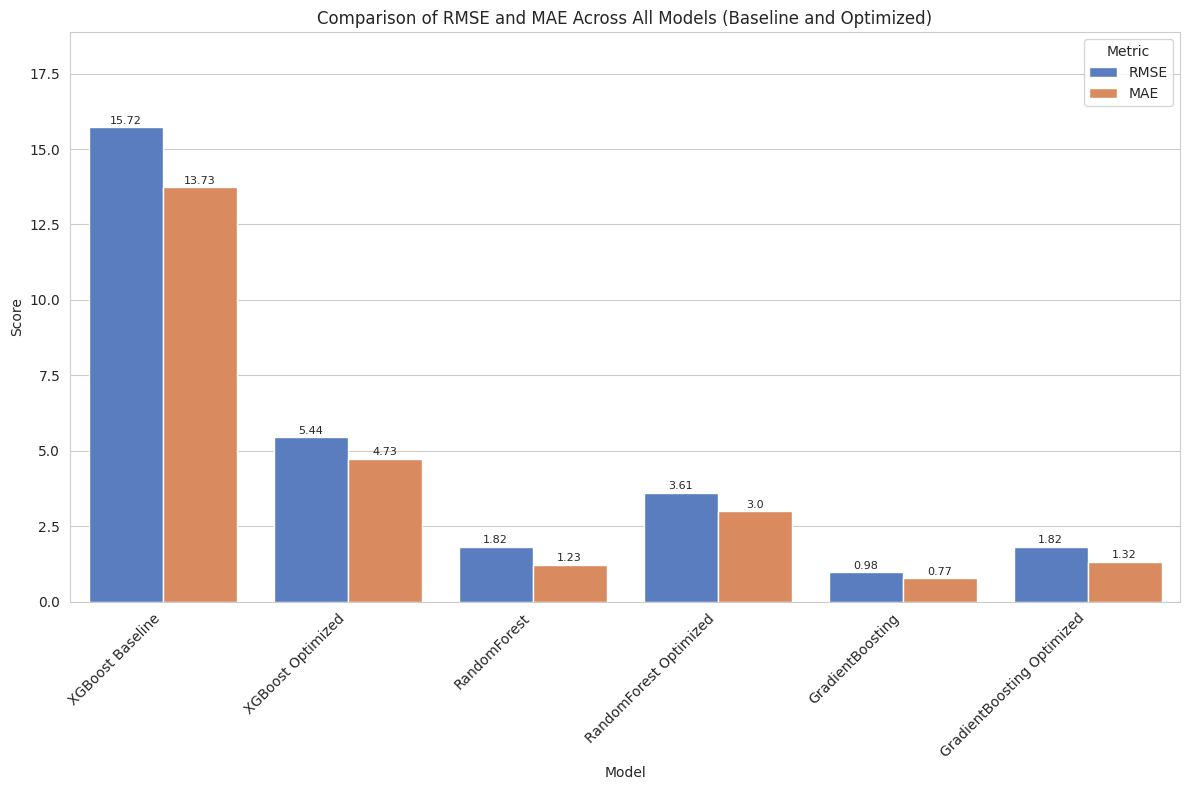

In [ ]:
print("\n" + "="*50)
print("--- Overall Model Performance Comparison ---")
print("="*50 + "\n")

if not df_performance.empty:
    print("Combined Performance of All Models:")
    print(df_performance)

    plt.figure(figsize=(12, 8))
    df_performance_melted = df_performance.melt(id_vars='Model', var_name='Metric', value_name='Score')
    sns.barplot(x='Model', y='Score', hue='Metric', data=df_performance_melted, palette='muted')
    plt.title('Comparison of RMSE and MAE Across All Models (Baseline and Optimized)')
    plt.ylabel('Score')
    plt.xlabel('Model')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, df_performance_melted['Score'].max() * 1.2) # Dynamic y-limit

    for container in plt.gca().containers:
        for bar in container:
            yval = bar.get_height()
            if not pd.isna(yval):
                plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, round(yval, 2), ha='center', va='bottom', fontsize=8)

    plt.tight_layout()
    plt.show()
else:
    print("No performance data available to generate overall comparison chart.")
